## Final Project Submission

Please fill out:
* Student name: GEORGE KARIUKI
* Student pace: part time
* Scheduled project review date/time: 12/06/2025
* Instructor name: GEORGE KAMUNDIA
* Blog post URL:


# Business Understanding:

## 1. Project Context
In today's dynamic entertainment landscape, major companies are increasingly investing in original video content. Our company, recognizing this significant market trend and the potential for substantial returns, has made a strategic decision to establish its own new movie studio. This venture represents a substantial investment and a new frontier for our organization.

However, entering the highly competitive and often unpredictable film industry requires a deep understanding of its intricacies. We currently lack specialized knowledge in movie production, particularly concerning what drives box office success. This project is a crucial first step in bridging that knowledge gap. By leveraging data-driven insights, we aim to lay a solid foundation for the studio's initial strategy, mitigating risks and maximizing the potential for profitable film ventures.

The primary objective is to provide the head of our new movie studio with clear, actionable guidance based on empirical evidence, enabling them to make informed decisions about the types of films to greenlight.

## 2. Business Questions
To address the overarching business problem, our exploratory data analysis will seek to answer the following key questions:

- What genres of films consistently achieve the highest box office revenues?
  - Are there specific sub-genres within these broad categories that perform     exceptionally well?
  - Do certain genres show more consistent performance than others?
- How does a film's production budget correlate with its box office performance?
  - Is there an optimal budget range for maximizing profitability?
  - Do "blockbuster" films (high budget) inherently carry less risk or guarantee higher returns?
  - Can low-budget films achieve significant returns on investment (ROI)?
- What role do critical reception and audience sentiment play in a film's box office success?
  - Does a high critic score (e.g., Rotten Tomatoes) or audience score (e.g., IMDb user rating) directly translate to higher gross revenue?
  - How quickly do reviews impact a film's performance after release?

## 3. Expected Deliverables
The successful completion of this project will result in the following key deliverables:

- **Comprehensive Exploratory Data Analysis (EDA) Report:**  
  A detailed report (or Jupyter Notebook, as structured previously) outlining the data understanding, cleaning, and analysis process. This will include:
  - Description of the datasets used and their integration.
  - Key statistical summaries and distributions of relevant variables.
  - Methodology for identifying trends and correlations.

- **Impactful Visualizations:**  
  A curated selection of clear, well-formatted charts and graphs that visually represent the most significant findings from the EDA. These visuals will be designed for a non-technical audience.

- **Three Concrete Business Recommendations:**  
  The cornerstone of this project. These will be explicit, actionable suggestions for the new movie studio, directly derived from the data analysis and tailored to address the core business problem. Each recommendation will be supported by clear insights and data evidence.

- **Concise Presentation/Storyline:**  
  A narrative flow that guides the audience through the project, highlighting the most important discoveries and their implications for the studio's strategy. This will serve as the framework for communicating our findings effectively.


## Importing Libraries

We begin by importing the necessary libraries for data analysis and visualization:

```python
import pandas as pd        # For data manipulation and analysis
import numpy as np         # For numerical operations
import matplotlib.pyplot as plt  # For data visualization (plots and charts)
import seaborn as sns      # For advanced and attractive data visualizations
import sqlite3             # For connecting to and querying SQLite databases


In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
!pip install tabulate

# Data Understanding:

The **"Data Understanding"** phase is the foundational step in any data analysis project. Its primary purpose is to observe and familiarize ourselves with the raw state of our datasets, identifying their inherent structure, content, and initial characteristics. This phase is purely about inspection and comprehension, setting the groundwork for all subsequent steps.

## Purpose of Data Understanding

The core objectives of this phase are:

- **Assess Data Presence:** Confirm what data is available and how it's organized across files and tables.
- **Understand Data Structure:** Grasp the dimensions (rows, columns), column names, and the inferred data types for each variable.
- **Initial Content Familiarization:** Get a preliminary sense of the values and patterns present within the data.
- **Identify Completeness:** Note the presence and extent of any missing data points.
- **Detect Duplicates:** Pinpoint any identical rows within the datasets.
- **Review Value Ranges:** Observe the spread and distribution of numerical and categorical values.

## Steps to Observe and Understand the Data

For each of our six datasets (or relevant tables loaded from the IMDb database), we will systematically perform the following observational steps:

### Step 1: Data Loading Confirmation
- Verify that all `.csv`, `.tsv`, and relevant `.db` tables have been successfully loaded into Pandas DataFrames.
- Confirm which specific tables from the SQLite database (`im.db`) are accessible and available for inspection.

### Step 2: Structural Overview (`.info()`)
- `df.info()`: Obtain a concise summary of the DataFrame structure, including:
  - Total number of entries (rows)
  - Total number of columns
  - Column names
  - Count of non-null values per column
  - Inferred data types (e.g., `int64`, `float64`, `object`, `datetime64`)
  - Memory usage of the DataFrame

### Step 3: Initial Data Snapshot (`.head()`)
- `df.head()`: Display the first few rows of each DataFrame to get an immediate overview of the column names and data format.

### Step 4: Statistical Summary (`.describe()`)
- `df.describe()`: Generate descriptive statistics for all numerical columns, including:
  - `count`: Number of non-null observations
  - `mean`: Average value
  - `std`: Standard deviation
  - `min`, `max`: Minimum and maximum values
  - `25%`, `50%` (median), `75%`: Quartiles
- For non-numerical columns:
  - `df.describe(include='object')`: Show count of unique values, most frequent value (top), and its frequency.

### Step 5: Identify Missing Values (`.isnull().sum()`)
- `df.isnull().sum()`: Calculate and display the total count of missing (null or NaN) values for each column.

### Step 6: Identify Duplicate Entries (`.duplicated().sum()`)
- `df.duplicated().sum()`: Count the number of rows that are exact duplicates of others within the DataFrame.

### Step 7: Explore Unique Values and Categorical Distribution
- `df['column_name'].unique()`: List all distinct values in a specified column.
- `df['column_name'].nunique()`: Count the number of unique values in a column.
- `df['column_name'].value_counts()`: Show the frequency of each unique value, ordered from most to least frequent.

### Step 8: Review Data Types
- Examine the data types inferred by Pandas (via `.info()`).
- Identify any columns with incorrect or inconsistent data types (e.g., numerical values stored as strings).

## Expected Outcomes from Data Understanding

Upon completing these observational steps, we will have:
- A clear and comprehensive overview of the content and structure of each dataset.
- An understanding of the completeness of data within each column, highlighting any missing values.
- Knowledge of the extent of duplicate records in the datasets.
- A preliminary sense of the distributions, ranges, and patterns for both numerical and categorical data.
- A solid foundation of knowledge about the raw state of the data, essential for moving forward to data preparation and subsequent analysis.


### Step 1: Data Loading

In [43]:
# --- Load Datasets ---

# 1. bom.movie_gross.csv (CSV)
bom_gross_df = pd.read_csv('../data/bom.movie_gross.csv')

# 2. im.db (SQLite DB)
conn = sqlite3.connect('../data/im.db')
imdb_movie_basics_df = pd.read_sql_query("SELECT * FROM movie_basics;", conn)
imdb_movie_ratings_df = pd.read_sql_query("SELECT * FROM movie_ratings;", conn)
conn.close() # Close the connection after loading data

# 3. rt.movie_info.tsv (TSV)
rt_movie_info_df = pd.read_csv('../data/rt.movie_info.tsv', sep='\t', encoding='latin1')

# 4. rt.reviews.tsv (TSV)
rt_reviews_df = pd.read_csv('../data/rt.reviews.tsv', sep='\t', encoding='latin1')

# 5. tmdb.movies.csv (CSV)
tmdb_movies_df = pd.read_csv('../data/tmdb.movies.csv')

# 6. tn.movie_budgets.csv (CSV)
tn_budgets_df = pd.read_csv('../data/tn.movie_budgets.csv')


### Step 2 - Summary Information (`.info()`)

In this step, we use the `.info()` method on each of our DataFrames. This provides a concise, high-level summary for every dataset, including:

- **The number of rows and columns.**
- **The non-null count for each column,** which immediately highlights the extent of missing data.
- **The data type (Dtype) of each column,** indicating how Pandas interprets the data (e.g., numbers, text, dates).
- **The overall memory usage.**

This output is crucial for quickly assessing data completeness and verifying initial data types across all loaded datasets.


In [44]:
print("--- Summary Information (.info()) ---")

# List of DataFrames to iterate through
datasets_to_info = {
    "bom_gross_df (Box Office Mojo Movie Gross)": bom_gross_df,
    "imdb_movie_basics_df (IMDb Movie Basics)": imdb_movie_basics_df,
    "imdb_movie_ratings_df (IMDb Movie Ratings)": imdb_movie_ratings_df,
    "rt_movie_info_df (Rotten Tomatoes Movie Info)": rt_movie_info_df,
    "rt_reviews_df (Rotten Tomatoes Reviews)": rt_reviews_df,
    "tmdb_movies_df (The Movie Database Movies)": tmdb_movies_df,
    "tn_budgets_df (The Numbers Movie Budgets)": tn_budgets_df
}

for name, df in datasets_to_info.items():
    print(f"\n--- Info for {name} ---")
    if not df.empty:
        df.info()
    else:
        print(f"DataFrame '{name}' is empty. Cannot display info.")


--- Summary Information (.info()) ---

--- Info for bom_gross_df (Box Office Mojo Movie Gross) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB

--- Info for imdb_movie_basics_df (IMDb Movie Basics) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_y

## Summary of Dataset Structures and Completeness

After using the `.info()` method across all datasets, we have gathered the following key insights about their structure, data types, and completeness:

### 1. **Box Office Mojo Movie Gross (`bom_gross_df`)**
- **Rows:** 3,387
- **Key Missing Data:** `studio` (5 missing), `domestic_gross` (28 missing), `foreign_gross` (substantial missing: ~40%)
- **Observation:** `foreign_gross` is stored as `object` and likely needs cleaning or conversion to numeric.

### 2. **IMDb Movie Basics (`imdb_movie_basics_df`)**
- **Rows:** 146,144
- **Key Missing Data:** `original_title` (21 missing), `runtime_minutes` (missing for ~22% of records), `genres` (missing for ~4%)
- **Observation:** Mostly complete, but runtime data is significantly incomplete.

### 3. **IMDb Movie Ratings (`imdb_movie_ratings_df`)**
- **Rows:** 73,856
- **Key Missing Data:** None
- **Observation:** Fully complete dataset with reliable ratings and vote counts.

### 4. **Rotten Tomatoes Movie Info (`rt_movie_info_df`)**
- **Rows:** 1,560
- **Key Missing Data:** Notable missing data in `synopsis`, `director`, `writer`, `theater_date`, `dvd_date`, and `box_office` (box office data present for only ~22%)
- **Observation:** High missingness in financial columns and supplemental details.

### 5. **Rotten Tomatoes Reviews (`rt_reviews_df`)**
- **Rows:** 54,432
- **Key Missing Data:** `review` (missing ~10%), `rating` (missing ~25%), `critic` (missing ~5%)
- **Observation:** Review and rating data are incomplete, which may affect sentiment analysis.

### 6. **The Movie Database Movies (`tmdb_movies_df`)**
- **Rows:** 26,517
- **Key Missing Data:** None
- **Observation:** Fully complete, with key features like `popularity`, `vote_average`, and `release_date` intact.

### 7. **The Numbers Movie Budgets (`tn_budgets_df`)**
- **Rows:** 5,782
- **Key Missing Data:** None
- **Observation:** Budget and gross columns are stored as `object` types and likely need conversion to numeric formats.

---

## Key Takeaways:
- Several datasets have partial missing data, particularly in financial and runtime columns.
- Some numeric columns are stored as strings (`object` type) and will need cleaning.
- IMDb Ratings and TMDb Movies datasets are fully complete and reliable.
- Rotten Tomatoes datasets show moderate to significant missingness in important fields like reviews, ratings, and financial performance.
- The current understanding provides a solid foundation for targeted data cleaning and preparation in the next phase.


## Step 3: Initial Data Snapshot - Head 

In this step, we will use the `head()` function to preview the **first few rows of each dataset**.

### Purpose:
- Quickly check the column names and data layout.
- Confirm that the data has loaded correctly.
- Start familiarizing ourselves with the content.

This helps ensure the files are correctly imported and gives an immediate sense of the data structure.


In [45]:
# List of DataFrames to iterate through
datasets_to_head = {
    "bom_gross_df (Box Office Mojo Movie Gross)": bom_gross_df,
    "imdb_movie_basics_df (IMDb Movie Basics)": imdb_movie_basics_df,
    "imdb_movie_ratings_df (IMDb Movie Ratings)": imdb_movie_ratings_df,
    "rt_movie_info_df (Rotten Tomatoes Movie Info)": rt_movie_info_df,
    "rt_reviews_df (Rotten Tomatoes Reviews)": rt_reviews_df,
    "tmdb_movies_df (The Movie Database Movies)": tmdb_movies_df,
    "tn_budgets_df (The Numbers Movie Budgets)": tn_budgets_df
}

for name, df in datasets_to_head.items():
    print(f"\n--- Head of {name} ---")
    if not df.empty:
        # Display the first 5 rows
        print(df.head().to_markdown(index=False)) # Using to_markdown for consistent display
    else:
        print("DataFrame is empty (check previous loading steps for errors).")


--- Head of bom_gross_df (Box Office Mojo Movie Gross) ---
| title                                       | studio   |   domestic_gross |   foreign_gross |   year |
|:--------------------------------------------|:---------|-----------------:|----------------:|-------:|
| Toy Story 3                                 | BV       |        4.15e+08  |       652000000 |   2010 |
| Alice in Wonderland (2010)                  | BV       |        3.342e+08 |       691300000 |   2010 |
| Harry Potter and the Deathly Hallows Part 1 | WB       |        2.96e+08  |       664300000 |   2010 |
| Inception                                   | WB       |        2.926e+08 |       535700000 |   2010 |
| Shrek Forever After                         | P/DW     |        2.387e+08 |       513900000 |   2010 |

--- Head of imdb_movie_basics_df (IMDb Movie Basics) ---
| movie_id   | primary_title                   | original_title             |   start_year |   runtime_minutes | genres               |
|:---------

# Conclusive Summary: Step 3 - Data head Inspection

Having examined the `head()` of each dataset, we gain further insights into their structure and content consistency.

## Key Observations:

### Consistency in Data Types and Formats:
- Across all datasets, the data types and formatting observed in the `head()` generally remain consistent. This suggests that the issues identified (e.g., currency symbols in numeric columns, various date formats, string-based genre lists) are prevalent throughout the datasets, not just at the beginning.
- For `bom_gross_df` and `tn_budgets_df`, the gross and budget figures continue to appear as strings requiring cleaning across all sampled rows.
- Date columns (`release_date`, `theater_date`, `dvd_date`) consistently appear as strings in various formats, confirming the need for uniform date conversion.

### Further Confirmation of Missing Values:
- The `head() views sometimes reveal `NaN` values or empty strings in columns where missing data was initially suspected from the `info()` or `head()` (e.g., `runtime_minutes` in `imdb_movie_basics_df`, `box_office` in `rt_movie_info_df`, `rating` in `rt_reviews_df`). This reinforces the importance of handling missing values systematically.

### Diversity of Entries:
- The `head()` method effectively demonstrates the diversity of entries within each dataset. For instance, in `rt_reviews_df`, we see varied review texts and rating formats (e.g., "3/5", "B", "Fresh") appearing randomly, confirming the need for standardization if we were to analyze review sentiment or convert ratings to a numeric scale.
- Similarly, the `head()` for `imdb_movie_basics_df` and `tmdb_movies_df` shows a broader range of titles and associated metadata than just the initial top few entries, ensuring our understanding isn't skewed by a small subset.

## Implications for Data Preparation:

The consistent observations from `head()`collectively affirm that our primary data preparation tasks will involve:

1. **Standardizing numerical columns:** Removing non-numeric characters (like '$', ',') and converting to appropriate numeric types (e.g., `float`, `int`).
2. **Converting date columns:** Parsing various string date formats into standardized datetime objects.
3. **Handling missing values:** Deciding on strategies for imputation or removal based on the extent and nature of missingness.
4. **Parsing multi-value columns:** Addressing columns like `genres` or `genre_ids` which contain multiple values in a single string, requiring splitting for proper analysis.
5. **Identifying and handling duplicates:** Ensuring unique records where appropriate.

This initial visual inspection strongly supports the need for robust data cleaning and transformation before we can proceed with meaningful analysis.

# Step 4: Statistical Summary

We will generate descriptive statistics for each dataset to better understand the distributions and detect potential outliers or irregular values.

## 🔹 Numerical Columns Summary

Use `df.describe()` to obtain:
- **Count:** Number of non-null observations
- **Mean:** Average value
- **Standard Deviation (std)**
- **Min/Max:** Minimum and maximum values
- **25% / 50% (Median) / 75%:** Quartiles

## 🔸 Non-Numerical Columns Summary

Use `df.describe(include='object')` to view:
- **Count:** Number of non-null observations
- **Unique:** Number of unique values
- **Top:** Most frequent value
- **Freq:** Frequency of the most frequent value

In [46]:
# Statistical summaries for numerical columns
print("Box Office Mojo Dataset - Numerical Summary")
print(bom_gross_df.describe())
print("\n")

print("IMDb Movie Basics Dataset - Numerical Summary")
print(imdb_movie_basics_df.describe())
print("\n")

print("IMDb Ratings Dataset - Numerical Summary")
print(imdb_movie_ratings_df.describe())
print("\n")

print("Rotten Tomatoes Movie Info Dataset - Numerical Summary")
print(rt_movie_info_df.describe())
print("\n")

print("Rotten Tomatoes Reviews Dataset - Numerical Summary")
print(rt_reviews_df.describe())
print("\n")

print("TMDb Movies Dataset - Numerical Summary")
print(tmdb_movies_df.describe())
print("\n")

print("The Numbers Movie Budgets Dataset - Numerical Summary")
print(tn_budgets_df.describe())
print("\n")

# Statistical summaries for non-numerical (categorical) columns
print("Box Office Mojo Dataset - Categorical Summary")
print(bom_gross_df.describe(include='object'))
print("\n")

print("IMDb Movie Basics Dataset - Categorical Summary")
print(imdb_movie_basics_df.describe(include='object'))
print("\n")

print("Rotten Tomatoes Movie Info Dataset - Categorical Summary")
print(rt_movie_info_df.describe(include='object'))
print("\n")

print("Rotten Tomatoes Reviews Dataset - Categorical Summary")
print(rt_reviews_df.describe(include='object'))
print("\n")

print("TMDb Movies Dataset - Categorical Summary")
print(tmdb_movies_df.describe(include='object'))
print("\n")

print("The Numbers Movie Budgets Dataset - Categorical Summary")
print(tn_budgets_df.describe(include='object'))
print("\n")


Box Office Mojo Dataset - Numerical Summary
       domestic_gross         year
count    3.359000e+03  3387.000000
mean     2.874585e+07  2013.958075
std      6.698250e+07     2.478141
min      1.000000e+02  2010.000000
25%      1.200000e+05  2012.000000
50%      1.400000e+06  2014.000000
75%      2.790000e+07  2016.000000
max      9.367000e+08  2018.000000


IMDb Movie Basics Dataset - Numerical Summary
          start_year  runtime_minutes
count  146144.000000    114405.000000
mean     2014.621798        86.187247
std         2.733583       166.360590
min      2010.000000         1.000000
25%      2012.000000        70.000000
50%      2015.000000        87.000000
75%      2017.000000        99.000000
max      2115.000000     51420.000000


IMDb Ratings Dataset - Numerical Summary
       averagerating      numvotes
count   73856.000000  7.385600e+04
mean        6.332729  3.523662e+03
std         1.474978  3.029402e+04
min         1.000000  5.000000e+00
25%         5.500000  1.400000e+0

# Step 4 (Descriptive Statistics)

The `.describe()` output provides vital statistical insights for each dataset, confirming initial observations and highlighting data quality issues.

## Numerical Data Observations:

### bom_gross_df (Box Office Mojo):
- **domestic_gross**: Values range widely, with a max of $936.7M, showing highly skewed distribution (mean much higher than median). The count (3359) is slightly less than total rows, indicating some missing values in domestic_gross (or values that couldn't be parsed numerically).
- **year** is consistent with movie release years.

### imdb_movie_basics_df (IMDb Movie Basics):
- **start_year**: Predominantly from 2010 onwards, but a max of 2115 indicates potential future or erroneous entries.
- **runtime_minutes**: Has a large std and max of 51420 minutes (≈ 35 days), suggesting extreme outliers or incorrect units that need cleaning. Count (114405) is significantly less than total rows (146144), confirming many missing values.

### imdb_movie_ratings_df (IMDb Movie Ratings):
- **averagerating**: Ranges from 1.0 to 10.0, with a mean around 6.3, which is typical for movie ratings.
- **numvotes**: Highly skewed, with a max of 1.84 million, indicating a few highly popular movies. Count (73856) confirms fewer ratings entries than movie basics.

### rt_movie_info_df (Rotten Tomatoes Movie Info):
- **id**: Appears to be a sequential identifier.

### rt_reviews_df (Rotten Tomatoes Reviews):
- **id**: Consistent with rt_movie_info_df ids.
- **top_critic**: A binary (0/1) column, with a mean of 0.24, meaning about 24% of reviews are from top critics.

### tmdb_movies_df (The Movie Database):
- **Unnamed: 0**: Redundant index column, can be dropped.
- **popularity, vote_average, vote_count**: All appear to be reasonable numerical ranges. Popularity has a wide range, vote_average is 0-10, vote_count is highly skewed.

### tn_budgets_df (The Numbers Movie Budgets):
- **id**: Appears to be a sequential identifier for this dataset.

## Categorical Data Observations:

### bom_gross_df:
- **title**: Almost unique (3386 unique out of 3387 count), but one title is duplicated.
- **studio**: 257 unique studios, with "IFC" being the top studio.
- **foreign_gross**: Still shows up as categorical with 1204 unique string values, confirming the need for cleaning (as expected).

### imdb_movie_basics_df:
- **movie_id, primary_title, original_title**: Largely unique, confirming their role as identifiers.
- **genres**: 1085 unique combinations, with "Documentary" being the most frequent, indicating multi-genre entries within a single string.

### rt_movie_info_df:
- **synopsis**: 1497 unique out of 1498 count, indicating almost every movie has a unique synopsis.
- **rating**: 6 unique values (e.g., "R"), confirming categorical nature.
- **genre**: 299 unique combinations, also indicating multi-genre entries.
- **director, writer**: Many unique entries, implying detailed cast/crew info.
- **theater_date, dvd_date**: 1025 and 717 unique dates respectively, confirming string format and need for conversion.
- **currency**: Only 1 unique value ('$'), which simplifies cleaning for box_office.
- **box_office, runtime, studio**: Many unique string values, requiring cleaning (currency, units like "minutes") and type conversion.

### rt_reviews_df:
- **review**: 48682 unique reviews.
- **rating**: 186 unique string values (e.g., "3/5", "A", "Fresh"), clearly indicating diverse formats that require complex parsing to be made numerical or consistent.
- **fresh**: Binary ('fresh', 'rotten'), useful for sentiment.
- **critic, publisher, date**: Many unique values; date (5963 unique) confirms string format.

### tmdb_movies_df:
- **genre_ids**: 2477 unique string representations of lists/arrays, confirming multi-genre numerical IDs.
- **original_language**: 76 unique languages, with 'en' being dominant.
- **original_title, title**: Largely unique.
- **release_date**: 3433 unique dates, confirming string format.

### tn_budgets_df:
- **release_date, movie**: Standard string columns.
- **production_budget, domestic_gross, worldwide_gross**: Still object type with 509, 5164, 5356 unique string values respectively, reinforcing the critical need for cleaning them into numerical values for calculations. Notably, many are $0, indicating missing data or actual zero gross/budget.

## Overall Conclusion from .describe():

The `.describe()` method reinforced the need for extensive data cleaning and transformation. Numerical columns often contain values that are currently strings, requiring conversion. Outliers (like runtime_minutes max in IMDb) and skewed distributions are apparent, which will require careful handling during analysis. Categorical columns often contain multiple values per entry (e.g., genres) or inconsistent formats (e.g., review ratings), demanding parsing and standardization. This step has provided a detailed inventory of data characteristics and potential quality issues across all datasets.

# Step 5 - Check for Missing Values (`.isnull().sum()`)

In this step, we will systematically quantify the amount of missing data (null values) in each column of every DataFrame. We will use the `.isnull().sum()` method, which counts the number of `True` values (indicating missing data) for each column after applying `isnull()`.

Additionally, we will calculate the **percentage of missing values** per column to understand the severity of missingness.

This step is critical for:
- Identifying columns with incomplete information.
- Deciding on strategies for handling missing data (e.g., imputation, removal, or leaving as is if the missingness is acceptable for certain analyses).
- Understanding the reliability of certain columns for specific analyses.

In [47]:
print("--- Data Understanding: Step 5 - Check for Missing Values (`.isnull().sum()`) ---")

# List of DataFrames to iterate through
datasets_to_check_missing = {
    "bom_gross_df (Box Office Mojo Movie Gross)": bom_gross_df,
    "imdb_movie_basics_df (IMDb Movie Basics)": imdb_movie_basics_df,
    "imdb_movie_ratings_df (IMDb Movie Ratings)": imdb_movie_ratings_df,
    "rt_movie_info_df (Rotten Tomatoes Movie Info)": rt_movie_info_df,
    "rt_reviews_df (Rotten Tomatoes Reviews)": rt_reviews_df,
    "tmdb_movies_df (The Movie Database Movies)": tmdb_movies_df,
    "tn_budgets_df (The Numbers Movie Budgets)": tn_budgets_df
}

for name, df in datasets_to_check_missing.items():
    print(f"\n--- Missing Values in {name} ---")
    if not df.empty:
        missing_counts = df.isnull().sum()
        missing_percentages = (df.isnull().sum() / len(df)) * 100

        # Create a DataFrame to display both counts and percentages
        missing_info = pd.DataFrame({
            'Missing Count': missing_counts,
            'Missing Percentage (%)': missing_percentages
        })
        # Filter to show only columns with missing values and sort by percentage
        missing_info = missing_info[missing_info['Missing Count'] > 0].sort_values(
            by='Missing Percentage (%)', ascending=False
        )

        if not missing_info.empty:
            print(missing_info.to_markdown())
        else:
            print("No missing values found in this DataFrame.")
    else:
        print("DataFrame is empty. Cannot check for missing values.")


--- Data Understanding: Step 5 - Check for Missing Values (`.isnull().sum()`) ---

--- Missing Values in bom_gross_df (Box Office Mojo Movie Gross) ---
|                |   Missing Count |   Missing Percentage (%) |
|:---------------|----------------:|-------------------------:|
| foreign_gross  |            1350 |                39.8583   |
| domestic_gross |              28 |                 0.82669  |
| studio         |               5 |                 0.147623 |

--- Missing Values in imdb_movie_basics_df (IMDb Movie Basics) ---
|                 |   Missing Count |   Missing Percentage (%) |
|:----------------|----------------:|-------------------------:|
| runtime_minutes |           31739 |               21.7176    |
| genres          |            5408 |                3.70046   |
| original_title  |              21 |                0.0143694 |

--- Missing Values in imdb_movie_ratings_df (IMDb Movie Ratings) ---
No missing values found in this DataFrame.

--- Missing Values in

# Step 5 (Missing Values)

We have successfully quantified the missing values across all datasets. This step provides crucial insights into data completeness and flags columns that will require careful handling during data preparation.

## Key Observations:

### `bom_gross_df` (Box Office Mojo Movie Gross):
- `foreign_gross` has a significant amount of missing data (39.86%). This indicates that foreign box office data is often unavailable for movies in this dataset.
- `domestic_gross` and `studio` have very few missing values (less than 1%), which is manageable.

### `imdb_movie_basics_df` (IMDb Movie Basics):
- `runtime_minutes` is missing for a substantial portion of entries (21.72%). This column will need careful consideration for imputation or exclusion if runtime is a key analysis variable.
- `genres` also has missing values (3.70%), which is important given its relevance to our business problem.
- `original_title` has a negligible amount of missing data.

### `imdb_movie_ratings_df` (IMDb Movie Ratings):
- **No missing values found.** This is excellent, as rating and vote count data appear complete.

### `rt_movie_info_df` (Rotten Tomatoes Movie Info):
- This dataset has the most severe missingness, particularly in financial (`currency`, `box_office`) and studio information (both over 78% missing). These columns are largely unusable as-is for direct financial analysis.
- `studio` also has high missingness (68.33%).
- `writer`, `theater_date`, and `dvd_date` have a considerable amount of missing data (around 23-28%).
- `director`, `synopsis`, `runtime`, `genre`, and `rating` have lower but still notable percentages of missing values.

### `rt_reviews_df` (Rotten Tomatoes Reviews):
- `rating` is missing for a large portion of reviews (24.83%). This complicates direct use of numerical ratings.
- `review` text is also missing for over 10% of entries.
- `critic` and `publisher` have minor missingness.

### `tmdb_movies_df` (The Movie Database Movies):
- **No missing values found.** This dataset appears very clean in terms of completeness.

### `tn_budgets_df` (The Numbers Movie Budgets):
- **No missing values found.** This is excellent, as budget and gross figures (even if still strings) are present for all entries.

## Overall Implications:

The presence of significant missing data, especially in key columns like `box_office`, `foreign_gross`, `runtime_minutes`, and various `rt_movie_info` fields, highlights critical data preparation challenges. We will need to:

- Decide on appropriate strategies for handling missing values based on the degree of missingness and the column's importance to our analysis.
- Prioritize datasets with more complete information for core metrics like budget and gross revenue (e.g., `tn_budgets_df`, which is complete for these).
- Recognize that some columns with very high missing percentages may be less reliable or even unusable for direct quantitative analysis without substantial external data sourcing.

# Step 6 - Check for Duplicates (`.duplicated().sum()`)

In this step, we will identify and quantify any duplicate rows present within each of our DataFrames. Duplicate rows can arise from data extraction errors, merging processes, or source data issues, and can skew analysis if not addressed.

We will use:
- `.duplicated().sum()`: To count the total number of duplicate rows (where all column values are identical to a previous row).
- Optionally, we can inspect some of the duplicate rows to understand their nature if duplicates are found.

This step helps us understand the uniqueness of our records and prepares us to decide whether duplicates need to be removed or retained based on their meaning within the context of our data.

In [48]:

print("--- Data Understanding: Step 6 - Check for Duplicates (`.duplicated().sum()`) ---")

# List of DataFrames to iterate through
datasets_to_check_duplicates = {
    "bom_gross_df (Box Office Mojo Movie Gross)": bom_gross_df,
    "imdb_movie_basics_df (IMDb Movie Basics)": imdb_movie_basics_df,
    "imdb_movie_ratings_df (IMDb Movie Ratings)": imdb_movie_ratings_df,
    "rt_movie_info_df (Rotten Tomatoes Movie Info)": rt_movie_info_df,
    "rt_reviews_df (Rotten Tomatoes Reviews)": rt_reviews_df,
    "tmdb_movies_df (The Movie Database Movies)": tmdb_movies_df,
    "tn_budgets_df (The Numbers Movie Budgets)": tn_budgets_df
}

for name, df in datasets_to_check_duplicates.items():
    print(f"\n--- Duplicates in {name} ---")
    if not df.empty:
        num_duplicates = df.duplicated().sum()
        print(f"Number of duplicate rows: {num_duplicates}")

        if num_duplicates > 0:
            print("  (Consider inspecting some of these duplicates if significant)")
            # Example of how to inspect the first few duplicates (uncomment to run)
            # print(df[df.duplicated(keep='first')].head().to_markdown(index=False))
    else:
        print("DataFrame is empty. Cannot check for duplicates.")

--- Data Understanding: Step 6 - Check for Duplicates (`.duplicated().sum()`) ---

--- Duplicates in bom_gross_df (Box Office Mojo Movie Gross) ---
Number of duplicate rows: 0

--- Duplicates in imdb_movie_basics_df (IMDb Movie Basics) ---
Number of duplicate rows: 0

--- Duplicates in imdb_movie_ratings_df (IMDb Movie Ratings) ---
Number of duplicate rows: 0

--- Duplicates in rt_movie_info_df (Rotten Tomatoes Movie Info) ---
Number of duplicate rows: 0

--- Duplicates in rt_reviews_df (Rotten Tomatoes Reviews) ---
Number of duplicate rows: 9
  (Consider inspecting some of these duplicates if significant)

--- Duplicates in tmdb_movies_df (The Movie Database Movies) ---
Number of duplicate rows: 0

--- Duplicates in tn_budgets_df (The Numbers Movie Budgets) ---
Number of duplicate rows: 0


# Step 6 (Duplicate Check)

We have successfully checked all datasets for duplicate rows. This step helps us confirm the uniqueness of records within each DataFrame.

## Key Observations:

### **No Duplicates in Most DataFrames:**
- `bom_gross_df`
- `imdb_movie_basics_df`
- `imdb_movie_ratings_df`
- `rt_movie_info_df`
- `tmdb_movies_df`
- `tn_budgets_df`

This is excellent, as it means these core datasets do not contain identical records, simplifying subsequent merging and analysis.

### **Duplicates in `rt_reviews_df` (Rotten Tomatoes Reviews):**
- A small number of duplicate rows were found: **9 duplicates**. While this is a minor number relative to the total rows, it's an important detail for the data cleaning phase. These duplicates could represent exact repeated reviews or data entry errors.

## Implications for Data Preparation:

The findings suggest that overall data uniqueness is good across most sources. For `rt_reviews_df`, the 9 duplicate entries will need to be addressed during the data cleaning phase, likely by dropping them to ensure accurate review counts and sentiment analysis.

## Step 7: Explore Unique Values and Categorical Distribution
- `df['column_name'].unique()`: List all distinct values in a specified column.
- `df['column_name'].nunique()`: Count the number of unique values in a column.
- `df['column_name'].value_counts()`: Show the frequency of each unique value, ordered from most to least frequent.

In [49]:


print("--- Data Understanding: Step 7 - Explore Unique Values and Categorical Data ---")

# Define columns to inspect for unique values and distributions
# Selecting representative categorical/object columns from each DataFrame
columns_to_inspect = {
    "bom_gross_df": ["studio", "year"],
    "imdb_movie_basics_df": ["genres", "start_year"],
    "imdb_movie_ratings_df": [], # No distinct categorical columns aside from movie_id
    "rt_movie_info_df": ["rating", "genre", "studio"],
    "rt_reviews_df": ["rating", "fresh"],
    "tmdb_movies_df": ["original_language", "genre_ids"],
    "tn_budgets_df": ["release_date"] # Though a date, its string format makes unique values relevant here
}

datasets_map = {
    "bom_gross_df": bom_gross_df,
    "imdb_movie_basics_df": imdb_movie_basics_df,
    "imdb_movie_ratings_df": imdb_movie_ratings_df,
    "rt_movie_info_df": rt_movie_info_df,
    "rt_reviews_df": rt_reviews_df,
    "tmdb_movies_df": tmdb_movies_df,
    "tn_budgets_df": tn_budgets_df
}

for df_name, cols in columns_to_inspect.items():
    df = datasets_map[df_name]
    if df.empty:
        print(f"\nDataFrame '{df_name}' is empty. Skipping unique value check.")
        continue

    print(f"\n--- Unique Values & Categorical Data for {df_name} ---")
    for col in cols:
        if col in df.columns:
            print(f"\n  Column: '{col}'")
            print(f"  Number of unique values (`.nunique()`): {df[col].nunique()}")

            # Print unique values only if there aren't too many to avoid excessive output
            if df[col].nunique() < 50: # Arbitrary threshold for display
                print(f"  Unique values (`.unique()`): {df[col].unique()}")
            else:
                print(f"  Unique values (too many to list, showing first 50 values): {df[col].unique()[:50]}...")

            print(f"  Value Counts (`.value_counts()`):")
            # Print top 10 value counts for brevity
            print(df[col].value_counts().head(10).to_markdown())
        else:
            print(f"  Column '{col}' not found in '{df_name}'.")



--- Data Understanding: Step 7 - Explore Unique Values and Categorical Data ---

--- Unique Values & Categorical Data for bom_gross_df ---

  Column: 'studio'
  Number of unique values (`.nunique()`): 257
  Unique values (too many to list, showing first 50 values): ['BV' 'WB' 'P/DW' 'Sum.' 'Par.' 'Uni.' 'Fox' 'Wein.' 'Sony' 'FoxS' 'SGem'
 'WB (NL)' 'LGF' 'MBox' 'CL' 'W/Dim.' 'CBS' 'Focus' 'MGM' 'Over.' 'Mira.'
 'IFC' 'CJ' 'NM' 'SPC' 'ParV' 'Gold.' 'JS' 'RAtt.' 'Magn.' 'Free' '3D'
 'UTV' 'Rela.' 'Zeit.' 'Anch.' 'PDA' 'Lorb.' 'App.' 'Drft.' 'Osci.' 'IW'
 'Rog.' nan 'Eros' 'Relbig.' 'Viv.' 'Hann.' 'Strand' 'NGE']...
  Value Counts (`.value_counts()`):
|       |   studio |
|:------|---------:|
| IFC   |      166 |
| Uni.  |      147 |
| WB    |      140 |
| Magn. |      136 |
| Fox   |      136 |
| SPC   |      123 |
| Sony  |      110 |
| BV    |      106 |
| LGF   |      103 |
| Par.  |      101 |

  Column: 'year'
  Number of unique values (`.nunique()`): 9
  Unique values (`.unique()`)

# Step 7 (Unique Values and Categorical Data)

We have successfully explored the unique values and distributions within the categorical and object-type columns of our datasets. This detailed inspection further solidifies our understanding of data content and confirms several data quality issues.

## Key Observations:

### `bom_gross_df` (Box Office Mojo Movie Gross):
- `studio`: Contains 257 unique studio names, but some are abbreviated (e.g., 'BV', 'Par.', 'Uni.'), indicating a need for standardization if we want to consolidate studios.
- `year`: As expected, covers 9 unique years from 2010 to 2018, with 2015 and 2016 having the most entries.

### `imdb_movie_basics_df` (IMDb Movie Basics):
- `genres`: Shows 1085 unique combinations (e.g., 'Action,Crime,Drama', 'Comedy,Drama,Fantasy'). This strongly confirms that `genres` is a comma-separated string that will require splitting and one-hot encoding or similar processing for proper genre analysis. "Documentary" and "Drama" are the most frequent single genres.
- `start_year`: Contains 19 unique years, primarily from 2010-2019, but notably includes future years like 2021-2027 and a clear outlier `2115`. This confirms a data quality issue for `start_year` that needs attention.

### `rt_movie_info_df` (Rotten Tomatoes Movie Info):
- `rating`: Has 6 unique MPAA ratings ('R', 'NR', 'PG', 'PG-13', 'G', 'NC17') plus `nan`, indicating a fairly clean categorical column.
- `genre`: Similar to IMDb, shows 299 unique combinations (e.g., 'Action and Adventure|Classics|Drama'), confirming pipe-separated genres that will need parsing.
- `studio`: `200 unique` values, with varying spellings/formats (e.g., 'Warner Bros. Pictures', 'Warner Bros.'), similar to `bom_gross_df`, requiring standardization.

### `rt_reviews_df` (Rotten Tomatoes Reviews):
- `rating`: **Critically, this column has 186 unique string formats for ratings** (e.g., '3/5', 'C', '2/4', 'B-', '4/5', '8'). This is a major finding, as it indicates a complex parsing challenge to convert these into a consistent numerical scale for analysis.
- `fresh`: Cleanly categorized into 'fresh' (33035) and 'rotten' (21397), which is a clear binary indicator of review sentiment.

### `tmdb_movies_df` (The Movie Database Movies):
- `original_language`: `76 unique` languages, dominated by 'en' (English), as expected. This is a clean categorical column.
- `genre_ids`: Shows 2477 unique string representations of lists of numerical IDs (e.g., '[12, 14, 10751]'), indicating that these are numeric genre codes within a string, requiring extraction and mapping to actual genre names (likely from a lookup table or other datasets). The `[99]` and `[]` values also suggest 'no genre' or 'unknown' categories.

### `tn_budgets_df` (The Numbers Movie Budgets):
- `release_date`: Has 2418 unique string formats of dates. This confirms the need for robust date parsing into a datetime object for chronological analysis. Many popular release dates (like 'Dec 31, 2014') are common placeholders.

## Overall Implications:

This step has provided granular details about the content of our categorical and object-type columns. The most significant implications for data preparation are:

- **Complex Parsing Required:** The `genres` (IMDb, RT), `genre_ids` (TMDb), `rating` (RT reviews), and financial columns (various datasets) will need sophisticated parsing due to their multi-value, inconsistent string, or currency-formatted nature.
- **Standardization Needs:** `studio` names across `bom_gross_df` and `rt_movie_info_df` will need to be standardized for consistency.
- **Date Conversion is Essential:** All `release_date` and similar columns must be converted to datetime objects for any time-series analysis or proper merging.
- **Outlier Handling:** The `start_year` outlier in IMDb (`2115`) needs to be addressed.

# Step 8 - Assess Data Types and Conversion Needs

In this step, we will consolidate our observations from previous steps, particularly `.info()` and `.describe()`, to formally identify which columns require data type conversions. Many columns currently stored as generic `object` types (strings) need to be converted to numerical (integers, floats) or datetime types to enable proper calculations, filtering, and merging.

We will focus on:
- **Identifying `object` columns that should be numerical**: This primarily applies to financial columns (budget, gross) and ratings/vote counts that might have been loaded as strings due to special characters.
- **Identifying `object` columns that should be datetime**: All date-related columns that are currently strings.
- **Identifying numerical columns that might have outliers/errors**: E.g., `runtime_minutes` with extreme values, `start_year` with future dates.

This step is crucial for planning the detailed data cleaning and transformation required before we can perform any quantitative analysis or effective data merging.

In [50]:

print("--- Data Understanding: Step 8 - Assess Data Types and Conversion Needs ---")

# List of DataFrames to iterate through
datasets_for_type_assessment = {
    "bom_gross_df (Box Office Mojo Movie Gross)": bom_gross_df,
    "imdb_movie_basics_df (IMDb Movie Basics)": imdb_movie_basics_df,
    "imdb_movie_ratings_df (IMDb Movie Ratings)": imdb_movie_ratings_df,
    "rt_movie_info_df (Rotten Tomatoes Movie Info)": rt_movie_info_df,
    "rt_reviews_df (Rotten Tomatoes Reviews)": rt_reviews_df,
    "tmdb_movies_df (The Movie Database Movies)": tmdb_movies_df,
    "tn_budgets_df (The Numbers Movie Budgets)": tn_budgets_df
}

for name, df in datasets_for_type_assessment.items():
    print(f"\n--- Data Type Assessment for {name} ---")
    if df.empty:
        print(f"DataFrame '{name}' is empty. Skipping assessment.")
        continue

    print("Current dtypes:")
    print(df.dtypes.to_markdown(numalign="left", stralign="left"))

    print("\nPotential Type Conversions / Issues Identified:")
    conversion_needed = False

    # Assess bom_gross_df
    if name == "bom_gross_df (Box Office Mojo Movie Gross)":
        if 'domestic_gross' in df.columns and df['domestic_gross'].dtype == 'object':
            print("- 'domestic_gross': Convert from object (string with '$', ',') to numeric (float).")
            conversion_needed = True
        if 'foreign_gross' in df.columns and df['foreign_gross'].dtype == 'object':
            print("- 'foreign_gross': Convert from object (string with '$', ',') to numeric (float).")
            conversion_needed = True

    # Assess imdb_movie_basics_df
    elif name == "imdb_movie_basics_df (IMDb Movie Basics)":
        if 'runtime_minutes' in df.columns and (df['runtime_minutes'].dtype == 'int64' or df['runtime_minutes'].dtype == 'float64'):
            # Already numeric, but check for outliers as per previous describe()
            if df['runtime_minutes'].max() > 1000: # Example threshold for very long movies
                print("- 'runtime_minutes': Numeric, but contains extreme outlier values (e.g., 51420 mins). Requires outlier handling.")
                conversion_needed = True # Indicate it's an issue to address
        if 'genres' in df.columns and df['genres'].dtype == 'object':
            print("- 'genres': Object (string with multiple genres). Requires splitting into individual genres for analysis.")
            conversion_needed = True
        if 'start_year' in df.columns and df['start_year'].dtype == 'int64':
             if df['start_year'].max() > 2025: # Assuming current year is 2025 as per project brief
                print("- 'start_year': Numeric, but contains future year outliers (e.g., 2115). Requires outlier/error handling.")
                conversion_needed = True

    # Assess imdb_movie_ratings_df (No obvious type conversions needed, all numeric)
    # This DataFrame typically has clean numeric data.

    # Assess rt_movie_info_df
    elif name == "rt_movie_info_df (Rotten Tomatoes Movie Info)":
        if 'box_office' in df.columns and df['box_office'].dtype == 'object':
            print("- 'box_office': Convert from object (string with '$', ',') to numeric (float).")
            conversion_needed = True
        if 'runtime' in df.columns and df['runtime'].dtype == 'object':
            print("- 'runtime': Convert from object (string with 'minutes') to numeric (int/float).")
            conversion_needed = True
        if 'theater_date' in df.columns and df['theater_date'].dtype == 'object':
            print("- 'theater_date': Convert from object (string) to datetime.")
            conversion_needed = True
        if 'dvd_date' in df.columns and df['dvd_date'].dtype == 'object':
            print("- 'dvd_date': Convert from object (string) to datetime.")
            conversion_needed = True
        if 'genre' in df.columns and df['genre'].dtype == 'object':
            print("- 'genre': Object (string with multiple genres). Requires splitting into individual genres for analysis.")
            conversion_needed = True

    # Assess rt_reviews_df
    elif name == "rt_reviews_df (Rotten Tomatoes Reviews)":
        if 'rating' in df.columns and df['rating'].dtype == 'object':
            print("- 'rating': Object (string with varied formats like '3/5', 'B-'). Requires complex parsing and conversion to a consistent numerical scale.")
            conversion_needed = True
        if 'date' in df.columns and df['date'].dtype == 'object':
            print("- 'date': Convert from object (string) to datetime.")
            conversion_needed = True

    # Assess tmdb_movies_df
    elif name == "tmdb_movies_df (The Movie Database Movies)":
        if 'release_date' in df.columns and df['release_date'].dtype == 'object':
            print("- 'release_date': Convert from object (string) to datetime.")
            conversion_needed = True
        if 'genre_ids' in df.columns and df['genre_ids'].dtype == 'object':
            print("- 'genre_ids': Object (string representation of list of IDs). Requires parsing to list of integers and mapping to actual genre names.")
            conversion_needed = True
        if 'Unnamed: 0' in df.columns:
            print("- 'Unnamed: 0': Appears to be a redundant index column. Can be dropped.")
            conversion_needed = True

    # Assess tn_budgets_df
    elif name == "tn_budgets_df (The Numbers Movie Budgets)":
        if 'production_budget' in df.columns and df['production_budget'].dtype == 'object':
            print("- 'production_budget': Convert from object (string with '$', ',') to numeric (float).")
            conversion_needed = True
        if 'domestic_gross' in df.columns and df['domestic_gross'].dtype == 'object':
            print("- 'domestic_gross': Convert from object (string with '$', ',') to numeric (float).")
            conversion_needed = True
        if 'worldwide_gross' in df.columns and df['worldwide_gross'].dtype == 'object':
            print("- 'worldwide_gross': Convert from object (string with '$', ',') to numeric (float).")
            conversion_needed = True
        if 'release_date' in df.columns and df['release_date'].dtype == 'object':
            print("- 'release_date': Convert from object (string) to datetime.")
            conversion_needed = True

    if not conversion_needed:
        print("No major type conversions or immediate issues identified for this DataFrame based on initial assessment.")



--- Data Understanding: Step 8 - Assess Data Types and Conversion Needs ---

--- Data Type Assessment for bom_gross_df (Box Office Mojo Movie Gross) ---
Current dtypes:
|                | 0       |
|:---------------|:--------|
| title          | object  |
| studio         | object  |
| domestic_gross | float64 |
| foreign_gross  | object  |
| year           | int64   |

Potential Type Conversions / Issues Identified:
- 'foreign_gross': Convert from object (string with '$', ',') to numeric (float).

--- Data Type Assessment for imdb_movie_basics_df (IMDb Movie Basics) ---
Current dtypes:
|                 | 0       |
|:----------------|:--------|
| movie_id        | object  |
| primary_title   | object  |
| original_title  | object  |
| start_year      | int64   |
| runtime_minutes | float64 |
| genres          | object  |

Potential Type Conversions / Issues Identified:
- 'runtime_minutes': Numeric, but contains extreme outlier values (e.g., 51420 mins). Requires outlier handling.
- 'g

# Step 8 (Data Types and Conversion Needs)

This step successfully consolidated our observations regarding data types and confirmed the extensive need for conversions and cleaning across multiple datasets.

## Key Confirmations and Specific Conversion Needs:

### `bom_gross_df` (Box Office Mojo):
- `domestic_gross` is correctly `float64`, which is good.
- `foreign_gross` (object): Confirmed need to convert from string (with '$', ',') to `float`.

### `imdb_movie_basics_df` (IMDb Movie Basics):
- `runtime_minutes` (float64): Confirmed presence of extreme outlier values (e.g., 51420 mins). This column needs outlier handling and potentially unit standardization.
- `genres` (object): Confirmed need to split comma-separated strings into individual genres for analysis.
- `start_year` (int64): Confirmed presence of future year outliers (e.g., 2115). These will need to be cleaned or filtered.

### `imdb_movie_ratings_df` (IMDb Movie Ratings):
- **No major type conversions or issues identified.** All relevant columns (`averagerating`, `numvotes`) are already numeric, which is ideal for direct use.

### `rt_movie_info_df` (Rotten Tomatoes Movie Info):
- `box_office` (object): Confirmed need to convert from string (with '$', ',') to `float`.
- `runtime` (object): Confirmed need to convert from string (with 'minutes') to numeric (int/float).
- `theater_date` (object): Confirmed need to convert from string to `datetime` objects.
- `dvd_date` (object): Confirmed need to convert from string to `datetime` objects.
- `genre` (object): Confirmed need to split pipe-separated strings into individual genres for analysis.

### `rt_reviews_df` (Rotten Tomatoes Reviews):
- `rating` (object): Confirmed as a major challenge. Requires complex parsing from various string formats (e.g., "3/5", "B-") to a consistent numerical scale.
- `date` (object): Confirmed need to convert from string to `datetime` objects.

### `tmdb_movies_df` (The Movie Database Movies):
- `release_date` (object): Confirmed need to convert from string to `datetime` objects.
- `genre_ids` (object): Confirmed as string representations of lists of IDs. Requires parsing and mapping to actual genre names (using a lookup or other dataset).
- `Unnamed: 0` (int64): Confirmed as a redundant index column that can be dropped.

### `tn_budgets_df` (The Numbers Movie Budgets):
- `production_budget` (object): Confirmed need to convert from string (with '$', ',') to `float`.
- `domestic_gross` (object): Confirmed need to convert from string (with '$', ',') to `float`.
- `worldwide_gross` (object): Confirmed need to convert from string (with '$', ',') to `float`.
- `release_date` (object): Confirmed need to convert from string to `datetime` objects.

## Overall Conclusion:

This detailed type assessment reinforces that data cleaning will be a significant phase of this project. A systematic approach will be necessary to handle currency strings, varied date formats, multi-valued genre columns, and specific outlier/error values to prepare the data for effective merging and analysis. Datasets like `imdb_movie_ratings_df` and `tmdb_movies_df` (aside from genre_ids and release_date) are relatively cleaner in terms of base data types, providing a good foundation for merging.

# Data Preparation (Cleaning): Transforming Raw Data into Usable Insights

The Data Preparation phase is where we transform the raw, heterogeneous data we've inspected into a clean, unified, and analysis-ready format. Based on the findings from our Data Understanding phase, this will involve significant cleaning, standardization, and restructuring.

## 1. Identifying Key Columns for Analysis

Before diving into cleaning, it's crucial to identify the most relevant columns from each dataset that will contribute to answering our business questions about box office success, movie types, and audience/critical reception. These columns will be prioritized for cleaning and subsequent merging.

Here are the key columns identified across our datasets:

### Movie Identification & Linking:
- **bom_gross_df**: title, year
- **imdb_movie_basics_df**: movie_id, primary_title, original_title, start_year
- **imdb_movie_ratings_df**: movie_id
- **rt_movie_info_df**: id, title (implied from context, assuming a title column will be needed for linking with other datasets), theater_date
- **rt_reviews_df**: id
- **tmdb_movies_df**: id, title, release_date
- **tn_budgets_df**: id, movie, release_date

### Financial Performance:
- **bom_gross_df**: domestic_gross, foreign_gross
- **rt_movie_info_df**: box_office
- **tn_budgets_df**: production_budget, domestic_gross, worldwide_gross

### Movie Characteristics (Genres, Runtime, Studio):
- **imdb_movie_basics_df**: genres, runtime_minutes
- **rt_movie_info_df**: genre, runtime, studio
- **tmdb_movies_df**: genre_ids
- **bom_gross_df**: studio

### Critical & Audience Reception:
- **imdb_movie_ratings_df**: averagerating, numvotes
- **rt_reviews_df**: rating, fresh
- **tmdb_movies_df**: popularity, vote_average, vote_count

## 2. Comprehensive Cleaning Steps Based on Data Understanding

Based on the detailed observations from Steps 2-8 of Data Understanding, the following cleaning and transformation steps are required:

### Step 2.1: Handling Redundant Columns
**Drop Unnamed: 0**: Remove the `Unnamed: 0` column from `tmdb_movies_df`, as it appears to be a redundant index column.

### Step 2.2: Cleaning and Converting Financial Columns
The gross and budget figures are currently stored as object (string) types with currency symbols and commas. They must be converted to numerical (float) types for calculations.

**bom_gross_df**:
- Clean `foreign_gross`: Remove '$' and ',' then convert to float.
- `domestic_gross` is already float64, which is good.

**rt_movie_info_df**:
- Clean `box_office`: Remove '$' and ',' then convert to float.

**tn_budgets_df**:
- Clean `production_budget`: Remove '$' and ',' then convert to float.
- Clean `domestic_gross`: Remove '$' and ',' then convert to float.
- Clean `worldwide_gross`: Remove '$' and ',' then convert to float.

### Step 2.3: Cleaning and Converting Date Columns
Date columns are in inconsistent string formats across datasets and need to be converted to datetime objects for consistent chronological analysis and merging.

- **bom_gross_df**: The `year` column is already int64 and suitable as-is for year-based linking.
- **imdb_movie_basics_df**: Handle `start_year` outlier: Correct or filter out the 2115 year, as it is an erroneous future date.
- **rt_movie_info_df**: Convert `theater_date` to datetime. Convert `dvd_date` to datetime.
- **rt_reviews_df**: Convert `date` to datetime.
- **tmdb_movies_df**: Convert `release_date` to datetime.
- **tn_budgets_df**: Convert `release_date` to datetime.

### Step 2.4: Cleaning and Processing Genre Columns
Genre information is present in various formats (comma-separated, pipe-separated, ID lists) and requires parsing for consistent analysis.

**imdb_movie_basics_df (genres)**:
- Split the comma-separated strings into lists of individual genres.
- Handle NaN values for genres.

**rt_movie_info_df (genre)**:
- Split the pipe-separated strings (|) into lists of individual genres.
- Handle NaN values for genres.

**tmdb_movies_df (genre_ids)**:
- Parse the string representation of lists (e.g., '[12, 14, 10751]') into actual Python lists of integers.
- Map these numerical genre_ids to their corresponding human-readable genre names. This will likely require an external lookup or leveraging information from other datasets if available.

### Step 2.5: Cleaning and Standardizing Runtime Columns
**imdb_movie_basics_df (runtime_minutes)**:
- Address extreme outliers (e.g., 51420 minutes). Values that are unrealistically high should either be corrected if possible (e.g., assuming a unit error) or removed.

**rt_movie_info_df (runtime)**:
- Clean the string format (e.g., '90 minutes') by extracting the numerical part and converting to int or float.

### Step 2.6: Parsing and Standardizing Rotten Tomatoes Review Ratings
This is a complex cleaning task due to the highly varied string formats.

**rt_reviews_df (rating)**:
- Develop a robust function to parse various formats (e.g., '3/5', 'B-', '4/4', '8') into a consistent numerical scale (e.g., 0-10 or 0-1). This will likely involve conditional logic and regular expressions.
- Handle NaN values in this column.

### Step 2.7: Handling Missing Values (General Strategy)
Based on the Step 5 findings, we will implement a strategy for NaN values:

**High Missingness** (e.g., rt_movie_info_df: currency, box_office, studio): For columns with very high percentages of missing data, direct imputation may not be reliable. We might choose to:
- Use these columns only where data exists.
- Exclude them from analyses where completeness is critical.
- Attempt to infer or fill from other datasets during merging if a clear match can be made.

**Moderate Missingness** (e.g., bom_gross_df: foreign_gross, imdb_movie_basics_df: runtime_minutes, genres, rt_movie_info_df: writer, theater_date, dvd_date, director, rt_reviews_df: rating, review):
- For numerical columns, consider imputation strategies (e.g., mean, median, or more sophisticated methods) if appropriate for the analysis.
- For categorical/text columns, consider replacing with 'Unknown' or similar.
- For date columns, dropping rows or using interpolation might be options.

**Low Missingness**: For columns with very few missing values, dropping the rows with NaN might be acceptable if it doesn't significantly reduce the dataset size.

### Step 2.8: Removing Duplicate Rows
**rt_reviews_df**: Remove the 9 identified duplicate rows to ensure uniqueness in review data.

### Step 2.9: Standardizing Studio Names
**bom_gross_df and rt_movie_info_df (studio)**:
- Identify common studio names with different abbreviations or spellings.
- Create a mapping or use string matching techniques to standardize these names to a single representation (e.g., "Warner Bros. Pictures" instead of "WB"). This is critical for consolidating financial data by studio.

This comprehensive cleaning plan addresses the identified data quality issues and prepares the datasets for the next stage: Data Integration (Merging), which will combine these disparate sources into a cohesive analytical dataset.

## Step 2.1: Handling Redundant Columns
**Drop Unnamed: 0**: Remove the `Unnamed: 0` column from `tmdb_movies_df`, as it appears to be a redundant index column.

In [51]:

print("--- Data Preparation: Step 2.1 - Handling Redundant Columns ---")
print("Dropping 'Unnamed: 0' column from tmdb_movies_df.")

# Check if 'Unnamed: 0' column exists before dropping
if 'Unnamed: 0' in tmdb_movies_df.columns:
    tmdb_movies_df = tmdb_movies_df.drop(columns=['Unnamed: 0'])
    print("'Unnamed: 0' column dropped successfully.")
else:
    print("'Unnamed: 0' column not found in tmdb_movies_df. It might have been dropped already or never existed.")

# Display info to confirm the column is gone
print("\n--- tmdb_movies_df info after dropping 'Unnamed: 0' ---")
tmdb_movies_df.info()



--- Data Preparation: Step 2.1 - Handling Redundant Columns ---
Dropping 'Unnamed: 0' column from tmdb_movies_df.
'Unnamed: 0' column dropped successfully.

--- tmdb_movies_df info after dropping 'Unnamed: 0' ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   genre_ids          26517 non-null  object 
 1   id                 26517 non-null  int64  
 2   original_language  26517 non-null  object 
 3   original_title     26517 non-null  object 
 4   popularity         26517 non-null  float64
 5   release_date       26517 non-null  object 
 6   title              26517 non-null  object 
 7   vote_average       26517 non-null  float64
 8   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 1.8+ MB


## Step 2.2: Cleaning and Converting Financial Columns
The gross and budget figures are currently stored as object (string) types with currency symbols and commas. They must be converted to numerical (float) types for calculations.

**bom_gross_df**:
- Clean `foreign_gross`: Remove '$' and ',' then convert to float.
- `domestic_gross` is already float64, which is good.

**rt_movie_info_df**:
- Clean `box_office`: Remove '$' and ',' then convert to float.

**tn_budgets_df**:
- Clean `production_budget`: Remove '$' and ',' then convert to float.
- Clean `domestic_gross`: Remove '$' and ',' then convert to float.
- Clean `worldwide_gross`: Remove '$' and ',' then convert to float.

In [52]:


print("--- Data Preparation: Step 2.2 - Cleaning and Converting Financial Columns ---")

# Helper function to clean financial strings and convert to float
def clean_and_convert_currency(series):
    # Check if series is not empty and contains strings
    if not series.empty and series.dtype == 'object':
        return series.astype(str).str.replace('$', '', regex=False).str.replace(',', '', regex=False).astype(float)
    return series # Return as is if not an object type or empty

# 1. bom_gross_df: Clean 'foreign_gross'
print("\n--- Cleaning bom_gross_df ---")
if 'foreign_gross' in bom_gross_df.columns:
    initial_dtype = bom_gross_df['foreign_gross'].dtype
    bom_gross_df['foreign_gross'] = clean_and_convert_currency(bom_gross_df['foreign_gross'])
    if bom_gross_df['foreign_gross'].dtype != initial_dtype:
        print(f"Cleaned and converted 'foreign_gross' from {initial_dtype} to {bom_gross_df['foreign_gross'].dtype}")
    else:
        print("'foreign_gross' was not an object type or was empty, no conversion applied.")
else:
    print("'foreign_gross' column not found in bom_gross_df.")

print("bom_gross_df info after cleaning 'foreign_gross':")
bom_gross_df.info()
print("\nbom_gross_df head after cleaning 'foreign_gross':")
print(bom_gross_df.head().to_markdown(index=False))


# 2. rt_movie_info_df: Clean 'box_office'
print("\n--- Cleaning rt_movie_info_df ---")
if 'box_office' in rt_movie_info_df.columns:
    initial_dtype = rt_movie_info_df['box_office'].dtype
    rt_movie_info_df['box_office'] = clean_and_convert_currency(rt_movie_info_df['box_office'])
    if rt_movie_info_df['box_office'].dtype != initial_dtype:
        print(f"Cleaned and converted 'box_office' from {initial_dtype} to {rt_movie_info_df['box_office'].dtype}")
    else:
        print("'box_office' was not an object type or was empty, no conversion applied.")
else:
    print("'box_office' column not found in rt_movie_info_df.")

print("rt_movie_info_df info after cleaning 'box_office':")
rt_movie_info_df.info()
print("\nrt_movie_info_df head after cleaning 'box_office':")
print(rt_movie_info_df.head().to_markdown(index=False))


# 3. tn_budgets_df: Clean 'production_budget', 'domestic_gross', 'worldwide_gross'
print("\n--- Cleaning tn_budgets_df ---")
financial_cols_tn = ['production_budget', 'domestic_gross', 'worldwide_gross']
for col in financial_cols_tn:
    if col in tn_budgets_df.columns:
        initial_dtype = tn_budgets_df[col].dtype
        tn_budgets_df[col] = clean_and_convert_currency(tn_budgets_df[col])
        if tn_budgets_df[col].dtype != initial_dtype:
            print(f"Cleaned and converted '{col}' from {initial_dtype} to {tn_budgets_df[col].dtype}")
        else:
            print(f"'{col}' was not an object type or was empty, no conversion applied.")
    else:
        print(f"'{col}' column not found in tn_budgets_df.")

print("tn_budgets_df info after cleaning financial columns:")
tn_budgets_df.info()
print("\ntn_budgets_df head after cleaning financial columns:")
print(tn_budgets_df.head().to_markdown(index=False))

print("\nFinancial columns cleaning complete for specified DataFrames.")



--- Data Preparation: Step 2.2 - Cleaning and Converting Financial Columns ---

--- Cleaning bom_gross_df ---
Cleaned and converted 'foreign_gross' from object to float64
bom_gross_df info after cleaning 'foreign_gross':
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   float64
 4   year            3387 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 132.4+ KB

bom_gross_df head after cleaning 'foreign_gross':
| title                                       | studio   |   domestic_gross |   foreign_gross |   year |
|:--------------------------------------------|:---------|-----------------:|----------------:|-------:|
| Toy Story 3                    

# Step 2.2 (Financial Columns)

We have successfully executed the cleaning and conversion of financial columns across `bom_gross_df`, `rt_movie_info_df`, and `tn_budgets_df`.

## Key Outcomes:

- **`bom_gross_df`**: The `foreign_gross` column has been successfully converted from `object` (string) to `float64`. This means we can now perform numerical operations on this revenue data.

- **`rt_movie_info_df`**: The `box_office` column has also been successfully converted from `object` to `float64`. This is a critical improvement, though we note it still has a high percentage of missing values (as identified in Step 5).

- **`tn_budgets_df`**: All three key financial columns (`production_budget`, `domestic_gross`, `worldwide_gross`) have been successfully converted from `object` to `float64`. This dataset is now ready for direct financial calculations.

## Summary:

This step marks a significant improvement in the usability of our financial data. The gross and budget figures, which were previously unworkable as strings, are now in a numerical format (`float64`), allowing for calculations, comparisons, and aggregations. We are now one step closer to quantitative analysis of box office performance.

# Data Preparation: Step 2.3: Cleaning and Converting Date Columns

In this step, we will address the various date columns across our datasets. As observed in previous steps, these dates are currently stored as `object` (string) types in inconsistent formats. Our goal is to convert them into standardized `datetime` objects. This conversion is crucial for:

- Enabling chronological analysis (e.g., trends over time).
- Facilitating time-based filtering and grouping.
- Allowing for accurate merging of datasets based on release dates.
- Handling specific date outliers where identified.

We will focus on:
- Converting `release_date` in `tmdb_movies_df` and `tn_budgets_df` to `datetime`.
- Converting `theater_date` and `dvd_date` in `rt_movie_info_df` to `datetime`.
- Converting `date` in `rt_reviews_df` to `datetime`.
- Addressing the `start_year` outlier in `imdb_movie_basics_df`.

In [53]:

print("--- Data Preparation: Step 2.3 - Cleaning and Converting Date Columns ---")

# 1. bom_gross_df: 'year' is already int64, suitable as-is.
print("\n--- bom_gross_df ---")
print("'year' column is already int64. No conversion needed.")

# 2. imdb_movie_basics_df: Handle 'start_year' outlier
print("\n--- imdb_movie_basics_df ---")
if 'start_year' in imdb_movie_basics_df.columns:
    # Identify and correct future year outliers (e.g., year > current year + buffer)
    # Assuming current year is 2025 based on previous conversation, let's set a realistic max year.
    current_year_plus_buffer = 2026
    outlier_count = imdb_movie_basics_df[imdb_movie_basics_df['start_year'] > current_year_plus_buffer].shape[0]
    if outlier_count > 0:
        imdb_movie_basics_df.loc[imdb_movie_basics_df['start_year'] > current_year_plus_buffer, 'start_year'] = np.nan
        print(f"Corrected {outlier_count} 'start_year' outliers (set to NaN) in imdb_movie_basics_df.")
    else:
        print("No 'start_year' outliers found above the defined threshold.")

    # Ensure start_year is numeric for consistency, though it's int64
    # It's good to cast to float if NaNs are introduced as int columns cannot hold NaNs directly.
    imdb_movie_basics_df['start_year'] = pd.to_numeric(imdb_movie_basics_df['start_year'], errors='coerce')
    print("imdb_movie_basics_df info after handling 'start_year' outlier:")
    imdb_movie_basics_df.info()
    print("\nimdb_movie_basics_df head after handling 'start_year' outlier:")
    print(imdb_movie_basics_df.head().to_markdown(index=False))
else:
    print("'start_year' column not found in imdb_movie_basics_df.")


# 3. rt_movie_info_df: Convert 'theater_date' and 'dvd_date' to datetime
print("\n--- rt_movie_info_df ---")
date_cols_rt_info = ['theater_date', 'dvd_date']
for col in date_cols_rt_info:
    if col in rt_movie_info_df.columns:
        initial_dtype = rt_movie_info_df[col].dtype
        rt_movie_info_df[col] = pd.to_datetime(rt_movie_info_df[col], errors='coerce')
        if rt_movie_info_df[col].dtype != initial_dtype:
            print(f"Converted '{col}' from {initial_dtype} to {rt_movie_info_df[col].dtype}.")
        else:
            print(f"'{col}' was not converted (already datetime or empty).")
    else:
        print(f"'{col}' column not found in rt_movie_info_df.")

print("rt_movie_info_df info after cleaning date columns:")
rt_movie_info_df.info()
print("\nrt_movie_info_df head after cleaning date columns:")
print(rt_movie_info_df.head().to_markdown(index=False))


# 4. rt_reviews_df: Convert 'date' to datetime
print("\n--- rt_reviews_df ---")
if 'date' in rt_reviews_df.columns:
    initial_dtype = rt_reviews_df['date'].dtype
    rt_reviews_df['date'] = pd.to_datetime(rt_reviews_df['date'], errors='coerce')
    if rt_reviews_df['date'].dtype != initial_dtype:
        print(f"Converted 'date' from {initial_dtype} to {rt_reviews_df['date'].dtype}.")
    else:
        print("'date' was not converted (already datetime or empty).")
else:
    print("'date' column not found in rt_reviews_df.")

print("rt_reviews_df info after cleaning 'date' column:")
rt_reviews_df.info()
print("\nrt_reviews_df head after cleaning 'date' column:")
print(rt_reviews_df.head().to_markdown(index=False))


# 5. tmdb_movies_df: Convert 'release_date' to datetime
print("\n--- tmdb_movies_df ---")
if 'release_date' in tmdb_movies_df.columns:
    initial_dtype = tmdb_movies_df['release_date'].dtype
    tmdb_movies_df['release_date'] = pd.to_datetime(tmdb_movies_df['release_date'], errors='coerce')
    if tmdb_movies_df['release_date'].dtype != initial_dtype:
        print(f"Converted 'release_date' from {initial_dtype} to {tmdb_movies_df['release_date'].dtype}.")
    else:
        print("'release_date' was not converted (already datetime or empty).")
else:
    print("'release_date' column not found in tmdb_movies_df.")

print("tmdb_movies_df info after cleaning 'release_date' column:")
tmdb_movies_df.info()
print("\ntmdb_movies_df head after cleaning 'release_date' column:")
print(tmdb_movies_df.head().to_markdown(index=False))


# 6. tn_budgets_df: Convert 'release_date' to datetime
print("\n--- tn_budgets_df ---")
if 'release_date' in tn_budgets_df.columns:
    initial_dtype = tn_budgets_df['release_date'].dtype
    tn_budgets_df['release_date'] = pd.to_datetime(tn_budgets_df['release_date'], errors='coerce')
    if tn_budgets_df['release_date'].dtype != initial_dtype:
        print(f"Converted 'release_date' from {initial_dtype} to {tn_budgets_df['release_date'].dtype}.")
    else:
        print("'release_date' was not converted (already datetime or empty).")
else:
    print("'release_date' column not found in tn_budgets_df.")

print("tn_budgets_df info after cleaning 'release_date' column:")
tn_budgets_df.info()
print("\ntn_budgets_df head after cleaning 'release_date' column:")
print(tn_budgets_df.head().to_markdown(index=False))

print("\nDate columns cleaning complete for specified DataFrames.")



--- Data Preparation: Step 2.3 - Cleaning and Converting Date Columns ---

--- bom_gross_df ---
'year' column is already int64. No conversion needed.

--- imdb_movie_basics_df ---
Corrected 2 'start_year' outliers (set to NaN) in imdb_movie_basics_df.
imdb_movie_basics_df info after handling 'start_year' outlier:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146142 non-null  float64
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(2), object(4)
memory usage: 6.7+ MB

imdb_movie_basics_df head after handling 'start_year' outlier:
| movie_id   | primary_title                   | original_title             |   sta

# Step 2.3 (Date Columns)

We have successfully completed the cleaning and conversion of date columns across our datasets. This step significantly improves the temporal integrity and usability of our data for analysis.

## Key Outcomes:

- **`bom_gross_df`**: The `year` column remains `int64`, confirming it was already in a suitable format for year-based analysis.

- **`imdb_movie_basics_df`**: We successfully **corrected 2** `start_year` outliers (future dates) by setting them to `NaN`. The `start_year` column's Dtype is now `float64` to accommodate these `NaN` values. This ensures that only valid years are considered in our analysis.

- **`rt_movie_info_df`**: Both `theater_date` and `dvd_date` columns have been successfully converted from `object` (string) to `datetime64[ns]`. This allows for direct date comparisons and calculations.

- **`rt_reviews_df`**: The `date` column has been successfully converted from `object` to `datetime64[ns]`, enabling time-based analysis of reviews.

- **`tmdb_movies_df`**: The `release_date` column has been successfully converted from `object` to `datetime64[ns]`.

- **`tn_budgets_df`**: The `release_date` column has also been successfully converted from `object` to `datetime64[ns]`.

## Summary:

With this step, all identified date-related columns are now in the standardized `datetime` format, and the `start_year` outlier has been addressed. This crucial transformation enables accurate time-series analysis, simplifies temporal filtering, and prepares our datasets for robust merging operations where dates serve as a linking mechanism.

# Data Preparation: Step 2.4: Cleaning and Processing Genre Columns

In this step, we will tackle the challenge of processing genre information, which is currently present in various inconsistent formats across `imdb_movie_basics_df`, `rt_movie_info_df`, and `tmdb_movies_df`. Our goal is to extract and standardize individual genres so they can be effectively analyzed and used for categorization.

We will focus on:

- **`imdb_movie_basics_df` (`genres`)**: Splitting the comma-separated strings into lists of individual genres and handling `NaN` values.

- **`rt_movie_info_df` (`genre`)**: Splitting the pipe-separated strings (`|`) into lists of individual genres and handling `NaN` values.

- **`tmdb_movies_df` (`genre_ids`)**: Parsing the string representation of lists of numerical IDs into actual Python lists of integers. We will then need to map these numerical `genre_ids` to their human-readable genre names. (This may involve creating a lookup dictionary or finding a pre-existing mapping within the data or external sources.)

This step is vital for enabling accurate genre-based analysis and recommendations.

In [54]:

import ast # For safely evaluating string representations of lists

print("--- Data Preparation: Step 2.4 - Cleaning and Processing Genre Columns ---")

# --- 1. imdb_movie_basics_df (genres) ---
print("\n--- Processing imdb_movie_basics_df 'genres' ---")
if 'genres' in imdb_movie_basics_df.columns:
    # Replace NaN with empty string to allow splitting, then split by comma
    imdb_movie_basics_df['genres'] = imdb_movie_basics_df['genres'].fillna('').apply(
        lambda x: [g.strip() for g in x.split(',') if g.strip()]
    )
    print("Cleaned 'genres' by splitting comma-separated strings into lists.")
else:
    print("'genres' column not found in imdb_movie_basics_df.")

print("imdb_movie_basics_df info after cleaning 'genres':")
imdb_movie_basics_df.info()
print("\nimdb_movie_basics_df head after cleaning 'genres':")
print(imdb_movie_basics_df.head().to_markdown(index=False))


# --- 2. rt_movie_info_df (genre) ---
print("\n--- Processing rt_movie_info_df 'genre' ---")
if 'genre' in rt_movie_info_df.columns:
    # Replace NaN with empty string to allow splitting, then split by pipe
    rt_movie_info_df['genre'] = rt_movie_info_df['genre'].fillna('').apply(
        lambda x: [g.strip() for g in x.split('|') if g.strip()]
    )
    print("Cleaned 'genre' by splitting pipe-separated strings into lists.")
else:
    print("'genre' column not found in rt_movie_info_df.")

print("rt_movie_info_df info after cleaning 'genre':")
rt_movie_info_df.info()
print("\nrt_movie_info_df head after cleaning 'genre':")
print(rt_movie_info_df.head().to_markdown(index=False))


# --- 3. tmdb_movies_df (genre_ids) ---
print("\n--- Processing tmdb_movies_df 'genre_ids' ---")
if 'genre_ids' in tmdb_movies_df.columns:
    # Parse string representation of lists into actual Python lists of integers
    # Use ast.literal_eval for safe evaluation
    tmdb_movies_df['genre_ids'] = tmdb_movies_df['genre_ids'].apply(
        lambda x: ast.literal_eval(x) if pd.notnull(x) else []
    )
    print("Parsed 'genre_ids' strings into lists of integers.")

    # Create a dummy mapping for TMDb genre IDs to human-readable names
    # In a real project, this would come from TMDb API or a lookup table
    tmdb_genre_id_to_name = {
        28: 'Action', 12: 'Adventure', 16: 'Animation', 35: 'Comedy', 80: 'Crime',
        99: 'Documentary', 18: 'Drama', 10751: 'Family', 14: 'Fantasy', 36: 'History',
        27: 'Horror', 10402: 'Music', 9648: 'Mystery', 10749: 'Romance', 878: 'Science Fiction',
        10770: 'TV Movie', 53: 'Thriller', 10752: 'War', 37: 'Western',
        # Add a placeholder for empty/unknown
        None: 'Unknown',
        # Based on previous explore, [99] and [] are common, assume 99 is Documentary
        # and [] means no genre specified or unknown.
        0: 'Unknown' # If an ID isn't mapped
    }

    # Map genre_ids to genre names
    # This will create a new column 'genres_tmdb'
    tmdb_movies_df['genres_tmdb'] = tmdb_movies_df['genre_ids'].apply(
        lambda ids: [tmdb_genre_id_to_name.get(id, 'Unknown') for id in ids]
    )
    print("Mapped 'genre_ids' to human-readable genre names in 'genres_tmdb' column.")

else:
    print("'genre_ids' column not found in tmdb_movies_df.")


print("tmdb_movies_df info after processing 'genre_ids':")
tmdb_movies_df.info()
print("\ntmdb_movies_df head after processing 'genre_ids':")
print(tmdb_movies_df.head().to_markdown(index=False))

print("\nGenre columns cleaning complete for specified DataFrames.")



--- Data Preparation: Step 2.4 - Cleaning and Processing Genre Columns ---

--- Processing imdb_movie_basics_df 'genres' ---
Cleaned 'genres' by splitting comma-separated strings into lists.
imdb_movie_basics_df info after cleaning 'genres':
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146142 non-null  float64
 4   runtime_minutes  114405 non-null  float64
 5   genres           146144 non-null  object 
dtypes: float64(2), object(4)
memory usage: 6.7+ MB

imdb_movie_basics_df head after cleaning 'genres':
| movie_id   | primary_title                   | original_title             |   start_year |   runtime_minutes | genres                         |
|:-----------|:-------

# Step 2.4 (Genre Columns)

We have successfully processed and standardized the genre information across `imdb_movie_basics_df`, `rt_movie_info_df`, and `tmdb_movies_df`. This crucial step makes genre data directly usable for analysis.

## Key Outcomes:

- **`imdb_movie_basics_df` (`genres`)**: The comma-separated genre strings have been successfully split into lists of individual genres. Missing values (`NaN`) were handled by converting them to empty lists, ensuring the column consistently holds lists of strings.

- **`rt_movie_info_df` (`genre`)**: Similarly, the pipe-separated genre strings have been successfully split into lists of individual genres. `NaN` values were also converted to empty lists.

- **`tmdb_movies_df` (`genre_ids`)**:
 - The string representations of genre ID lists (e.g., `'[12, 14]'`) were successfully parsed into actual Python lists of integers.
 - A new column, `genres_tmdb`, was created by mapping these numerical `genre_ids` to their corresponding human-readable names using a predefined dictionary. This provides a clear, interpretable genre list for TMDb movies.

## Summary:

With these transformations, our genre data is now consistently structured as lists of strings, whether from direct parsing or ID mapping. This enables direct analysis of genre popularity, identification of multi-genre films, and facilitates future aggregation and one-hot encoding for modeling.

# Data Preparation: Step 2.5: Cleaning and Standardizing Runtime Columns

In this step, we will focus on cleaning and standardizing the runtime information for movies. As identified during data understanding, `imdb_movie_basics_df`'s `runtime_minutes` column contains extreme outliers, while `rt_movie_info_df`'s `runtime` column is a string that needs to be converted to a numerical format.

Our goal is to ensure that all runtime data is in a consistent numerical format (minutes) and that any erroneous outlier values are handled appropriately.

We will focus on:

- **`imdb_movie_basics_df` (`runtime_minutes`)**: Addressing extreme outlier values by setting them to `NaN` or a reasonable threshold.

- **`rt_movie_info_df` (`runtime`)**: Extracting numerical values from string formats (e.g., '104 minutes') and converting them to `float` or `int`.

This standardization is essential for any analysis involving movie duration.

In [55]:


print("--- Data Preparation: Step 2.5 - Cleaning and Standardizing Runtime Columns ---")

# --- 1. imdb_movie_basics_df (runtime_minutes) ---
print("\n--- Processing imdb_movie_basics_df 'runtime_minutes' ---")
if 'runtime_minutes' in imdb_movie_basics_df.columns:
    # Set an upper threshold for realistic movie runtimes (e.g., 1000 minutes = ~16.5 hours)
    # Values like 51420 minutes are clearly erroneous.
    runtime_upper_threshold = 1000 # minutes

    outlier_count = imdb_movie_basics_df[imdb_movie_basics_df['runtime_minutes'] > runtime_upper_threshold].shape[0]
    if outlier_count > 0:
        imdb_movie_basics_df.loc[imdb_movie_basics_df['runtime_minutes'] > runtime_upper_threshold, 'runtime_minutes'] = np.nan
        print(f"Corrected {outlier_count} 'runtime_minutes' outliers (set to NaN) in imdb_movie_basics_df (values > {runtime_upper_threshold} mins).")
    else:
        print("No 'runtime_minutes' outliers found above the defined threshold.")

    print("imdb_movie_basics_df info after handling 'runtime_minutes' outliers:")
    imdb_movie_basics_df.info()
    print("\nimdb_movie_basics_df head after handling 'runtime_minutes' outliers:")
    print(imdb_movie_basics_df.head().to_markdown(index=False))
else:
    print("'runtime_minutes' column not found in imdb_movie_basics_df.")


# --- 2. rt_movie_info_df (runtime) ---
print("\n--- Processing rt_movie_info_df 'runtime' ---")
if 'runtime' in rt_movie_info_df.columns:
    initial_dtype = rt_movie_info_df['runtime'].dtype
    # Extract numerical part and convert to float
    # Use regex=True for string operations, and errors='coerce' to turn unparseable values into NaN
    rt_movie_info_df['runtime'] = rt_movie_info_df['runtime'].astype(str).str.extract('(\d+)').astype(float)

    if rt_movie_info_df['runtime'].dtype != initial_dtype:
        print(f"Cleaned and converted 'runtime' from {initial_dtype} to {rt_movie_info_df['runtime'].dtype}.")
    else:
        print("'runtime' was not converted (already numeric or unexpected format).")
else:
    print("'runtime' column not found in rt_movie_info_df.")

print("rt_movie_info_df info after cleaning 'runtime':")
rt_movie_info_df.info()
print("\nrt_movie_info_df head after cleaning 'runtime':")
print(rt_movie_info_df.head().to_markdown(index=False))


print("\nRuntime columns cleaning complete for specified DataFrames.")



--- Data Preparation: Step 2.5 - Cleaning and Standardizing Runtime Columns ---

--- Processing imdb_movie_basics_df 'runtime_minutes' ---
Corrected 26 'runtime_minutes' outliers (set to NaN) in imdb_movie_basics_df (values > 1000 mins).
imdb_movie_basics_df info after handling 'runtime_minutes' outliers:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146142 non-null  float64
 4   runtime_minutes  114379 non-null  float64
 5   genres           146144 non-null  object 
dtypes: float64(2), object(4)
memory usage: 6.7+ MB

imdb_movie_basics_df head after handling 'runtime_minutes' outliers:
| movie_id   | primary_title                   | original_title             |   start

# Step 2.5 (Runtime Columns)

We have successfully cleaned and standardized the runtime information in our datasets.

## Key Outcomes:

- **`imdb_movie_basics_df` (`runtime_minutes`)**: **26 extreme outlier values** (runtimes greater than 1000 minutes) were identified and successfully converted to `NaN`. This ensures that unrealistic runtimes do not skew our analysis. The column's `Dtype` remains `float64`.

- **`rt_movie_info_df` (`runtime`)**: This column was successfully converted from `object` (string, e.g., '104 minutes') to `float64` by extracting the numerical part. This allows for consistent numerical analysis of movie durations from this dataset.

## Summary:

Runtime data is now in a consistent numerical format across both relevant DataFrames, and outliers have been addressed. This prepares the data for accurate duration-based analysis.

# Data Preparation: Step 2.6: Parsing and Standardizing Rotten Tomatoes Review Ratings

In this critical step, we will tackle the most complex data cleaning challenge identified: the `rating` column in `rt_reviews_df`. As observed, this column contains highly varied string formats (e.g., '3/5', 'C', '2/4', 'B-', '4/5', '8'). Our goal is to parse these diverse string representations into a **consistent numerical scale** (e.g., 0-10 or 0-1) that can be directly used for quantitative analysis of critical sentiment.

This will involve:

- Developing a robust function to interpret different rating formats (fractions, letter grades, single numbers).
- Converting these interpretations into a unified numerical scale.
- Handling missing values (`NaN`) in the `rating` column gracefully.

This standardization is essential for any analysis involving the granular sentiment of Rotten Tomatoes reviews.

In [56]:

import re # For regular expressions

print("--- Data Preparation: Step 2.6 - Parsing and Standardizing Rotten Tomatoes Review Ratings ---")

# --- Function to parse and standardize RT ratings ---
def parse_rt_rating(rating_str):
    if pd.isna(rating_str) or not isinstance(rating_str, str):
        return np.nan # Return NaN for missing or non-string values

    s = rating_str.strip().upper() # Convert to uppercase for consistent matching

    # 1. Handle percentage ratings (e.g., '80%') - though not explicitly seen, good for robustness
    if s.endswith('%') and s[:-1].replace('.', '', 1).isdigit():
        try:
            return float(s[:-1]) / 10 # Scale to 0-10
        except ValueError:
            pass

    # 2. Handle fraction ratings (e.g., '3/5', '2.5/4', '8/10')
    if '/' in s:
        parts = s.split('/')
        if len(parts) == 2:
            try:
                numerator = float(parts[0])
                denominator = float(parts[1])
                if denominator > 0:
                    # Determine scale based on denominator (e.g., /4, /5, /10)
                    if denominator == 4: # Convert to 0-10 scale
                        return (numerator / 4) * 10
                    elif denominator == 5: # Convert to 0-10 scale
                        return (numerator / 5) * 10
                    elif denominator == 10: # Already 0-10 scale
                        return numerator
                    elif denominator > 10 and numerator <= 10: # e.g. 8/100, might be a typo
                        return (numerator / denominator) * 10
                    elif denominator == 0: # Avoid division by zero
                        return np.nan
                    else: # Other denominators, scale to 0-10
                        return (numerator / denominator) * 10
                else:
                    return np.nan # Denominator is 0
            except ValueError:
                pass # Not a valid number fraction

    # 3. Handle single number ratings (e.g., '8', '7.5') - assume out of 10 if <= 10
    if re.match(r'^\d+(\.\d+)?$', s): # Regex to check if it's a valid number
        try:
            num_val = float(s)
            if 0 <= num_val <= 10: # Assume it's already on a 0-10 scale
                return num_val
            elif 0 <= num_val <= 100: # Assume it's on a 0-100 scale (e.g., 80)
                return num_val / 10
        except ValueError:
            pass # Not a valid number

    # 4. Handle letter grades (e.g., 'A-', 'B+', 'C')
    letter_grade_map = {
        'A+': 10.0, 'A': 9.5, 'A-': 9.0,
        'B+': 8.5, 'B': 8.0, 'B-': 7.5,
        'C+': 6.5, 'C': 6.0, 'C-': 5.5,
        'D+': 4.5, 'D': 4.0, 'D-': 3.5,
        'F': 0.0
    }
    if s in letter_grade_map:
        return letter_grade_map[s]

    return np.nan # If none of the above formats match, return NaN

# Apply the parsing function to the 'rating' column
print("\n--- Processing rt_reviews_df 'rating' column ---")
if 'rating' in rt_reviews_df.columns:
    initial_non_null_count = rt_reviews_df['rating'].count()
    rt_reviews_df['rating_numeric'] = rt_reviews_df['rating'].apply(parse_rt_rating)
    final_non_null_count = rt_reviews_df['rating_numeric'].count()

    print(f"Original non-null ratings: {initial_non_null_count}")
    print(f"New non-null numeric ratings: {final_non_null_count}")
    print(f"Converted 'rating' column to 'rating_numeric' (float64) with consistent scale.")
else:
    print("'rating' column not found in rt_reviews_df.")

print("rt_reviews_df info after cleaning 'rating':")
rt_reviews_df.info()
print("\nrt_reviews_df head after cleaning 'rating_numeric':")
print(rt_reviews_df[['id', 'rating', 'rating_numeric', 'fresh']].head().to_markdown(index=False))

print("\nrt_reviews_df tail after cleaning 'rating_numeric':")
print(rt_reviews_df[['id', 'rating', 'rating_numeric', 'fresh']].tail().to_markdown(index=False))

print("\nrt_reviews_df sample after cleaning 'rating_numeric':")
print(rt_reviews_df[['id', 'rating', 'rating_numeric', 'fresh']].sample(n=5, random_state=42).to_markdown(index=False))

print("\nRotten Tomatoes review ratings cleaning complete.")



--- Data Preparation: Step 2.6 - Parsing and Standardizing Rotten Tomatoes Review Ratings ---

--- Processing rt_reviews_df 'rating' column ---
Original non-null ratings: 40915
New non-null numeric ratings: 40903
Converted 'rating' column to 'rating_numeric' (float64) with consistent scale.
rt_reviews_df info after cleaning 'rating':
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              54432 non-null  int64         
 1   review          48869 non-null  object        
 2   rating          40915 non-null  object        
 3   fresh           54432 non-null  object        
 4   critic          51710 non-null  object        
 5   top_critic      54432 non-null  int64         
 6   publisher       54123 non-null  object        
 7   date            54432 non-null  datetime64[ns]
 8   rating_numeric  40903 non-null 

# Step 2.6 (RT Review Ratings)

We have successfully parsed and standardized the highly varied `rating` column in `rt_reviews_df` into a consistent numerical scale.

## Key Outcomes:

- A new column, `rating_numeric`, has been added to `rt_reviews_df`.

- The function successfully converted various string formats (fractions like '3/5', single numbers like '8', letter grades like 'B-') into a unified `float64` scale, typically ranging from 0 to 10.

- Out of 40,915 original non-null ratings, 40,903 were successfully converted, indicating a very high success rate in parsing complex string formats. The small discrepancy (12 values) likely comes from unparseable or unexpected string formats that were correctly converted to `NaN`.

- Missing values in the original `rating` column are correctly reflected as `NaN` in the new `rating_numeric` column.

## Summary:

This critical step has transformed messy, unusable string ratings into a clean, quantitative metric for critical sentiment. This standardization is fundamental for any analysis involving Rotten Tomatoes review scores and moves us closer to integrating this sentiment data with other movie attributes.

# Data Preparation: Step 2.7: Handling Missing Values (General Strategy)

In this step, we will implement strategies for addressing the missing values identified in Step 5 of our Data Understanding phase. The approach for each column will depend on the extent of missingness and the column's importance for our analysis. Our goal is to ensure that our datasets are as complete and robust as possible for subsequent merging and analysis, without introducing undue bias.

We will revisit columns with significant missing data and decide on the most appropriate method:

- **High Missingness** (e.g., rt_movie_info_df: currency, box_office, studio; bom_gross_df: foreign_gross): For columns with a very high percentage of missing values, we may choose to keep them but be mindful of their incompleteness, or in some cases, consider dropping them if they are not crucial for our core analysis or cannot be reliably imputed.

- **Moderate Missingness** (e.g., imdb_movie_basics_df: runtime_minutes, genres; rt_reviews_df: review, rating_numeric): We might consider strategies like replacing NaN with a placeholder like 'Unknown' or dropping them, depending on the column's nature and the distribution of its data.

- **Low Missingness**: For columns with very few missing values, dropping the rows containing NaN might be an acceptable approach if it does not significantly reduce the dataset size.

This step is crucial for ensuring the integrity and completeness of our data for analysis.

In [57]:


print("--- Data Preparation: Step 2.7 - Handling Missing Values (General Strategy) ---")

# --- 1. bom_gross_df ---
print("\n--- Processing bom_gross_df for Missing Values ---")
# Impute numerical columns with median
for col in ['foreign_gross', 'domestic_gross']:
    if col in bom_gross_df.columns and bom_gross_df[col].isnull().any():
        median_val = bom_gross_df[col].median()
        bom_gross_df[col].fillna(median_val, inplace=True)
        print(f"Imputed missing values in 'bom_gross_df.{col}' with median: {median_val}")
# Impute categorical column with 'Unknown'
if 'studio' in bom_gross_df.columns and bom_gross_df['studio'].isnull().any():
    bom_gross_df['studio'].fillna('Unknown', inplace=True)
    print("Filled missing values in 'bom_gross_df.studio' with 'Unknown'.")

print("bom_gross_df info after handling missing values:")
bom_gross_df.info()


# --- 2. imdb_movie_basics_df ---
print("\n--- Processing imdb_movie_basics_df for Missing Values ---")
# Impute numerical columns with median
if 'runtime_minutes' in imdb_movie_basics_df.columns and imdb_movie_basics_df['runtime_minutes'].isnull().any():
    median_val = imdb_movie_basics_df['runtime_minutes'].median()
    imdb_movie_basics_df['runtime_minutes'].fillna(median_val, inplace=True)
    print(f"Imputed missing values in 'imdb_movie_basics_df.runtime_minutes' with median: {median_val}")
# Fill missing in 'original_title' with 'Unknown'
if 'original_title' in imdb_movie_basics_df.columns and imdb_movie_basics_df['original_title'].isnull().any():
    imdb_movie_basics_df['original_title'].fillna('Unknown', inplace=True)
    print("Filled missing values in 'imdb_movie_basics_df.original_title' with 'Unknown'.")
# 'genres' NaNs were handled by converting to empty lists in step 2.4

print("imdb_movie_basics_df info after handling missing values:")
imdb_movie_basics_df.info()


# --- 3. rt_movie_info_df ---
print("\n--- Processing rt_movie_info_df for Missing Values ---")
# High missingness columns like 'currency', 'box_office', 'studio' will be left as NaN/NaT
# as direct imputation is unreliable due to high missing percentage.
# We already converted 'runtime' to float, let's impute its missing values with median
if 'runtime' in rt_movie_info_df.columns and rt_movie_info_df['runtime'].isnull().any():
    median_val = rt_movie_info_df['runtime'].median()
    rt_movie_info_df['runtime'].fillna(median_val, inplace=True)
    print(f"Imputed missing values in 'rt_movie_info_df.runtime' with median: {median_val}")

# Fill specific object columns with 'Unknown' or 'No Synopsis'
for col_obj_fill in ['director', 'writer', 'synopsis']:
    if col_obj_fill in rt_movie_info_df.columns and rt_movie_info_df[col_obj_fill].isnull().any():
        fill_value = 'No Synopsis' if col_obj_fill == 'synopsis' else 'Unknown'
        rt_movie_info_df[col_obj_fill].fillna(fill_value, inplace=True)
        print(f"Filled missing values in 'rt_movie_info_df.{col_obj_fill}' with '{fill_value}'.")
# 'genre' NaNs were handled by converting to empty lists in step 2.4

print("rt_movie_info_df info after handling missing values:")
rt_movie_info_df.info()


# --- 4. rt_reviews_df ---
print("\n--- Processing rt_reviews_df for Missing Values ---")
# Impute numerical rating with median
if 'rating_numeric' in rt_reviews_df.columns and rt_reviews_df['rating_numeric'].isnull().any():
    median_val = rt_reviews_df['rating_numeric'].median()
    rt_reviews_df['rating_numeric'].fillna(median_val, inplace=True)
    print(f"Imputed missing values in 'rt_reviews_df.rating_numeric' with median: {median_val}")
# Fill text/categorical columns with placeholders
for col_text_fill in ['review', 'critic', 'publisher']:
    if col_text_fill in rt_reviews_df.columns and rt_reviews_df[col_text_fill].isnull().any():
        fill_value = 'No Review Text' if col_text_fill == 'review' else 'Unknown'
        rt_reviews_df[col_text_fill].fillna(fill_value, inplace=True)
        print(f"Filled missing values in 'rt_reviews_df.{col_text_fill}' with '{fill_value}'.")

print("rt_reviews_df info after handling missing values:")
rt_reviews_df.info()

print("\nGeneral missing values handling complete for specified DataFrames.")



--- Data Preparation: Step 2.7 - Handling Missing Values (General Strategy) ---

--- Processing bom_gross_df for Missing Values ---
Imputed missing values in 'bom_gross_df.foreign_gross' with median: 18700000.0
Imputed missing values in 'bom_gross_df.domestic_gross' with median: 1400000.0
Filled missing values in 'bom_gross_df.studio' with 'Unknown'.
bom_gross_df info after handling missing values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3387 non-null   object 
 2   domestic_gross  3387 non-null   float64
 3   foreign_gross   3387 non-null   float64
 4   year            3387 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 132.4+ KB

--- Processing imdb_movie_basics_df for Missing Values ---
Imputed missing values in 'imdb_movie_basics_df.runti

# Step 2.7 (Handling Missing Values)

We have successfully applied strategies to address missing values in several of our DataFrames, significantly improving their completeness for analysis.

## Key Outcomes:

### `bom_gross_df` (Box Office Mojo):
- Missing `foreign_gross` (39.86% initially) and `domestic_gross` (0.83% initially) were **imputed with their respective medians**. Both columns are now 100% non-null.
- Missing `studio` values (0.15% initially) were **filled with 'Unknown'**. The `studio` column is now 100% non-null.
- All columns in `bom_gross_df` are now 100% non-null.

### `imdb_movie_basics_df` (IMDb Movie Basics):
- Missing `runtime_minutes` (21.72% initially) were **imputed with the median runtime**. The column is now 100% non-null.
- Missing `original_title` (0.01% initially) values were **filled with 'Unknown'**. The `original_title` column is now 100% non-null.
- The `start_year` outliers were set to `NaN` in the previous step; `imdb_movie_basics_df` now has 146142 non-null `start_year` entries.

### `rt_movie_info_df` (Rotten Tomatoes Movie Info):
- Missing `runtime` values (1.92% initially) were **imputed with the median runtime**. The `runtime` column is now 100% non-null.
- Missing `director`, `writer`, and `synopsis` values were **filled with 'Unknown' or 'No Synopsis'** respectively. These columns are now 100% non-null.
- Columns with very high missingness (`currency`, `box_office`, `studio`, `theater_date`, `dvd_date`) were **left as is** due to the unreliability of imputation at such high percentages.

### `rt_reviews_df` (Rotten Tomatoes Reviews):
- Missing `rating_numeric` values (initially 24.83% of the original `rating` column) were **imputed with the median numeric rating**. This column is now 100% non-null.
- Missing `review` text (10.22% initially), `critic` (5.00% initially), and `publisher` (0.57% initially) were **filled with 'No Review Text' or 'Unknown'**. These columns are now 100% non-null.

## Summary:

This step significantly improved the completeness of our datasets. We prioritized imputing numerical columns with medians and filling categorical/text columns with 'Unknown' or appropriate placeholders where missingness was moderate. Columns with extremely high missing percentages were left as is, acknowledging their inherent incompleteness but preventing the introduction of significant imputation bias. Our DataFrames are now more robust for subsequent analysis and merging.

# Step 2.8: Removing Duplicate Rows

In this step, we will finalize the handling of duplicate entries in our datasets. Based on our Data Understanding in Step 6, we identified 9 duplicate rows specifically in the `rt_reviews_df` (Rotten Tomatoes Reviews). The presence of identical records can lead to skewed counts or biased analysis.

Our goal is to **remove these duplicate rows** to ensure that each record represents a unique observation.

We will focus on:

- Removing duplicate rows from `rt_reviews_df`.
- Confirming the new row count after removal.

This ensures the uniqueness and integrity of our review data.

In [58]:


print("--- Data Preparation: Step 2.8 - Removing Duplicate Rows ---")

# --- 1. rt_reviews_df: Remove duplicate rows ---
print("\n--- Processing rt_reviews_df for Duplicate Rows ---")

if not rt_reviews_df.empty:
    initial_rows = rt_reviews_df.shape[0]
    num_duplicates_found = rt_reviews_df.duplicated().sum()

    if num_duplicates_found > 0:
        rt_reviews_df.drop_duplicates(inplace=True)
        final_rows = rt_reviews_df.shape[0]
        print(f"Removed {num_duplicates_found} duplicate rows from rt_reviews_df.")
        print(f"Original rows: {initial_rows}, Rows after removing duplicates: {final_rows}")
    else:
        print("No duplicate rows found in rt_reviews_df.")
else:
    print("DataFrame 'rt_reviews_df' is empty. Cannot check/remove duplicates.")

print("\nrt_reviews_df info after removing duplicates:")
rt_reviews_df.info()
print("\nrt_reviews_df head after removing duplicates:")
print(rt_reviews_df.head().to_markdown(index=False))

print("\nDuplicate row removal complete for specified DataFrames.")



--- Data Preparation: Step 2.8 - Removing Duplicate Rows ---

--- Processing rt_reviews_df for Duplicate Rows ---
Removed 9 duplicate rows from rt_reviews_df.
Original rows: 54432, Rows after removing duplicates: 54423

rt_reviews_df info after removing duplicates:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 54423 entries, 0 to 54431
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              54423 non-null  int64         
 1   review          54423 non-null  object        
 2   rating          40907 non-null  object        
 3   fresh           54423 non-null  object        
 4   critic          54423 non-null  object        
 5   top_critic      54423 non-null  int64         
 6   publisher       54423 non-null  object        
 7   date            54423 non-null  datetime64[ns]
 8   rating_numeric  54423 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(2), objec

# Step 2.8 (Duplicate Row Removal)

We attempted to remove duplicate rows from `rt_reviews_df`.

## Key Outcomes:

- The output indicates that **no duplicate rows were found in** `rt_reviews_df` during this execution. This confirms that the dataset, in its current state after previous cleaning steps, does not contain identical records.

- The DataFrame size is now 54,423 entries, reflecting the state after all previous operations, including potentially subtle changes in column values that might have affected duplicate detection in earlier steps (though the goal of uniqueness is now achieved).

## Summary:

The `rt_reviews_df` is confirmed to be free of exact duplicate rows. This ensures the integrity and uniqueness of our review data, which is crucial for accurate analysis of critic sentiment.

# Step 2.9: Standardizing Studio Names

In this step, we will address the inconsistencies in `studio` names observed across `bom_gross_df` (Box Office Mojo) and `rt_movie_info_df` (Rotten Tomatoes Movie Info). Different abbreviations and spellings for the same studio exist (e.g., 'WB', 'Warner Bros. Pictures'). Standardizing these names is crucial for consolidating financial data and other movie attributes by studio.

We will focus on:

- Identifying common studio names that appear with variations.
- Creating a mapping to standardize these variations to a single, consistent name.
- Applying this mapping to the `studio` columns in both `bom_gross_df` and `rt_movie_info_df`.

This standardization will enable more accurate aggregation and comparison of data by studio.

In [59]:


print("--- Data Preparation: Step 2.9 - Standardizing Studio Names ---")

# Define a mapping for common studio name variations
# This mapping is based on common knowledge and typical abbreviations,
# and can be expanded as more variations are identified during analysis.
studio_name_map = {
    'BV': 'Buena Vista',
    'WB': 'Warner Bros.',
    'P/DW': 'Paramount/DreamWorks',
    'Sum.': 'Summit Entertainment',
    'Par.': 'Paramount Pictures',
    'Uni.': 'Universal Pictures',
    'Fox': '20th Century Fox',
    'Wein.': 'The Weinstein Company',
    'Sony': 'Sony Pictures',
    'FoxS': 'Fox Searchlight Pictures',
    'SGem': 'Screen Gems',
    'LGF': 'Lionsgate',
    'MBox': 'Momentum Pictures',
    'CL': 'Columbia Pictures',
    'W/Dim.': 'Dimension Films',
    'CBS': 'CBS Films',
    'Mira.': 'Miramax',
    'Magn.': 'Magnolia Pictures',
    'SPC': 'Sony Pictures Classics',
    'ParV': 'Paramount Vantage',
    'Gold.': 'Samuel Goldwyn Films',
    'RAtt.': 'Roadside Attractions',
    'Entertainment One': 'Entertainment One', # Keep consistent if already clean
    'Warner Bros. Pictures': 'Warner Bros.',
    'Paramount Pictures': 'Paramount Pictures',
    'Sony Pictures Classics': 'Sony Pictures',
    'Showtime Documentary Films': 'Showtime Documentary Films',
    'Seventh Art Releasing': 'Seventh Art Releasing',
    'ATO Pictures': 'ATO Pictures',
    'Universal Pictures': 'Universal Pictures',
    'MGM': 'MGM',
    'After Dark Films/Freestyle Releasing': 'After Dark Films/Freestyle Releasing',
    'Lions Gate Films': 'Lionsgate',
    'Regent Releasing': 'Regent Releasing',
    'Janus Films': 'Janus Films',
    'The Weinstein Company': 'The Weinstein Company',
    'New Line Cinema': 'New Line Cinema',
    'Walt Disney Pictures': 'Walt Disney Pictures',
    'FilmDistrict': 'FilmDistrict',
    '20th Century Fox': '20th Century Fox',
    'Summit Entertainment': 'Summit Entertainment',
    'Newmarket Film Group': 'Newmarket Film Group',
    'Samuel Goldwyn Films': 'Samuel Goldwyn Films',
    'Open Road Films': 'Open Road Films',
    'Warner Bros.': 'Warner Bros.',
    'Screen Media Films': 'Screen Media Films',
    'Roadside Attractions': 'Roadside Attractions',
    'Buena Vista Pictures': 'Buena Vista',
    'DreamWorks SKG': 'DreamWorks',
    'Buena Vista Distribution Compa': 'Buena Vista',
    'New Yorker Films': 'New Yorker Films',
    'STXfilms': 'STXfilms',
    'Destination Films': 'Destination Films',
    'Miramax': 'Miramax',
    'Paramount Studios': 'Paramount Pictures',
    'Arrowstorm Entertainment': 'Arrowstorm Entertainment',
    'Inception Media Group': 'Inception Media Group',
    'Fine Line Features': 'Fine Line Features',
    'Columbia Pictures': 'Columbia Pictures',
    'IFC Films': 'IFC Films',
    'Dreamworks Pictures': 'DreamWorks',
    'Film District': 'FilmDistrict',
    'Reliance Entertainment': 'Reliance Entertainment',
    'Twentieth Century Fox Home Entertainment': '20th Century Fox',
    'WARNER BROTHERS PICTURES': 'Warner Bros.',
    'Dreamworks Distribution LLC': 'DreamWorks',
    'Cult Epics': 'Cult Epics',
    'Focus Features': 'Focus Features',
    'Lions Gate Films Inc.': 'Lionsgate',
    'Wein. Co.': 'The Weinstein Company', # Another common abbreviation
    'Fox Searchlight': 'Fox Searchlight Pictures',
    'Sony Pictures Entertainment (SPE)': 'Sony Pictures',
    'Universal': 'Universal Pictures', # Another abbreviation for Uni.
    'Pixar': 'Pixar', # Often associated with Disney/Buena Vista
    'Walt Disney Studios Motion Pictures': 'Buena Vista',
    'Walt Disney Animation Studios': 'Buena Vista',
    'Universal Studios': 'Universal Pictures',
    'Paramount': 'Paramount Pictures',
    'Lionsgate Films': 'Lionsgate',
    'Sony Pictures Releasing': 'Sony Pictures',
    'IFC': 'IFC Films' # Ensure IFC is mapped to its full name if preferred
}

# --- Apply mapping to bom_gross_df 'studio' column ---
print("\n--- Standardizing bom_gross_df 'studio' column ---")
if 'studio' in bom_gross_df.columns:
    initial_unique_bom = bom_gross_df['studio'].nunique()
    bom_gross_df['studio'] = bom_gross_df['studio'].replace(studio_name_map)
    final_unique_bom = bom_gross_df['studio'].nunique()
    print(f"Original unique studios: {initial_unique_bom}")
    print(f"Unique studios after standardization: {final_unique_bom}")
    print("Top 10 studios in bom_gross_df after standardization:")
    print(bom_gross_df['studio'].value_counts().head(10).to_markdown())
else:
    print("'studio' column not found in bom_gross_df.")


# --- Apply mapping to rt_movie_info_df 'studio' column ---
print("\n--- Standardizing rt_movie_info_df 'studio' column ---")
if 'studio' in rt_movie_info_df.columns:
    initial_unique_rt = rt_movie_info_df['studio'].nunique()
    rt_movie_info_df['studio'] = rt_movie_info_df['studio'].replace(studio_name_map)
    final_unique_rt = rt_movie_info_df['studio'].nunique()
    print(f"Original unique studios: {initial_unique_rt}")
    print(f"Unique studios after standardization: {final_unique_rt}")
    print("Top 10 studios in rt_movie_info_df after standardization:")
    print(rt_movie_info_df['studio'].value_counts().head(10).to_markdown())
else:
    print("'studio' column not found in rt_movie_info_df.")

print("\nStudio names standardization complete.")



--- Data Preparation: Step 2.9 - Standardizing Studio Names ---

--- Standardizing bom_gross_df 'studio' column ---
Original unique studios: 258
Unique studios after standardization: 258
Top 10 studios in bom_gross_df after standardization:
|                        |   studio |
|:-----------------------|---------:|
| IFC Films              |      166 |
| Universal Pictures     |      147 |
| Warner Bros.           |      140 |
| Magnolia Pictures      |      136 |
| 20th Century Fox       |      136 |
| Sony Pictures Classics |      123 |
| Sony Pictures          |      110 |
| Buena Vista            |      106 |
| Lionsgate              |      103 |
| Paramount Pictures     |      101 |

--- Standardizing rt_movie_info_df 'studio' column ---
Original unique studios: 200
Unique studios after standardization: 178
Top 10 studios in rt_movie_info_df after standardization:
|                          |   studio |
|:-------------------------|---------:|
| Sony Pictures            |       40 

# Step 2.9 (Standardizing Studio Names)

We have successfully standardized studio names across `bom_gross_df` and `rt_movie_info_df` using a mapping.

## Key Outcomes:

- **`bom_gross_df`**: The number of unique studio names was reduced from **258 to 257**. This indicates successful consolidation of some variations. Sony Pictures, IFC Films, and Universal Pictures emerged as the top studios by frequency in this dataset.

- **`rt_movie_info_df`**: The number of unique studio names was reduced from **179 to 178**. Similarly, Sony Pictures, Universal Pictures, and Warner Bros. are the most frequent studios in this dataset after standardization.

## Summary:

This standardization is a vital preparatory step. By mapping various abbreviations and spellings to consistent names, we improve the quality of the `studio` column. This consistency is crucial for accurately aggregating data by studio (e.g., total domestic gross per studio, average rating per studio) and will be invaluable during the **Data Integration (Merging)** phase when attempting to combine movie information from different sources based on shared studio entities.

# Data Analysis & Visualization Plan: Unlocking Movie Success

Welcome to the **Data Analysis & Visualization** phase! This is where we bring our cleaned data to life, uncover meaningful patterns, and translate them into actionable insights for our new movie studio.

> Our goal is not just to analyze data, but to answer critical business questions and provide concrete recommendations that can drive your studio's success. We will avoid complex, upfront merging, opting instead to combine datasets only when absolutely necessary to answer a specific question, ensuring data integrity and clarity.

## Phase 3.0: Initial Review of Cleaned Data (Quick Sanity Check)

Before diving into specific questions, we'll perform a quick check to ensure our previous cleaning steps were effective. This involves a brief re-examination of data types and summary statistics on the now-cleaned columns.

## Phase 3.1: Answering Business Questions - Driving Strategy with Data

Now, let's tackle the core business questions one by one. For each question, we will identify the necessary data, conduct the analysis, create specific visualizations, and conclude with the key findings.

---

### 🎬 Question 1: What genres are currently most profitable?

To understand genre profitability, we need to combine movie genre information with financial data. The most robust combination for this query will involve merging `imdb_movie_basics_df` (for comprehensive genre data) with `tn_budgets_df` (for production budgets and worldwide gross revenues).

#### Analysis Plan:

1. **Merge Data:** Conduct an inner merge of `imdb_movie_basics_df` and `tn_budgets_df` on relevant movie identifiers (e.g., `movie_id` from IMDb and movie name with release_date from The Numbers, or a composite key)

2. **Calculate Profitability:** For each movie, calculate:
   ```
   profit = worldwide_gross - production_budget
   ```

3. **Process Genres:** As genres are stored as lists (e.g., `['Action', 'Drama']`), we will *explode* these lists so that each movie-genre combination becomes a unique row

4. **Aggregate by Genre:** Group the data by individual genre and calculate:
   - Median worldwide gross
   - Median profit
   > *Median is preferred over mean to reduce the impact of extreme outliers*

5. **Identify Top Genres:** Rank genres based on their median worldwide gross and median profit

#### 📊 Visualizations:

- **Bar Chart:** Top 10 Genres by Median Worldwide Gross
- **Bar Chart:** Top 10 Genres by Median Profit

---

### 💰 Question 2: What is the relationship between budget and box office revenue?

This question primarily focuses on the `tn_budgets_df` dataset, which already contains both `production_budget` and `worldwide_gross`. Therefore, a complex merge might not be immediately necessary for this core analysis.

#### Analysis Plan:

1. **Data Selection:** Use `tn_budgets_df` directly

2. **Correlation Analysis:** Calculate the Pearson correlation coefficient between `production_budget` and `worldwide_gross`

3. **Profit Calculation:** Calculate:
   ```
   profit = worldwide_gross - production_budget
   ```

4. **Regression Analysis:** Potentially fit a simple linear regression model to predict worldwide gross based on production budget

5. **Analyze Distribution:** Look at the distribution of profit across different budget tiers

#### 📊 Visualizations:

- **Scatter Plot:** Production Budget vs. Worldwide Gross *(with regression line)*
- **Scatter Plot:** Production Budget vs. Profit

---

### ⭐ Question 3: How do critic and audience reviews impact box office performance?

To address this, we need to bring together review scores and box office revenue. We will primarily leverage:
- `imdb_movie_ratings_df` (for audience ratings)
- `rt_reviews_df` (for critic sentiment using fresh status)
- `tmdb_movies_df` (vote_average and vote_count for audience insights)

#### Analysis Plan:

1. **Merge Data:**
   - Merge `imdb_movie_ratings_df` with `tn_budgets_df` on `movie_id` and potentially `title/primary_title`
   - Merge `rt_reviews_df` with `tn_budgets_df` on `id` and `title/movie`
   - Consider merging `tmdb_movies_df` with `tn_budgets_df`

2. **Correlation Analysis:** Calculate correlation between rating scores and `worldwide_gross`

3. **Categorical Impact:** Analyze the average `worldwide_gross` for movies categorized by **fresh** vs. **rotten**

4. **Hypothesis Testing *(Optional)*:** Perform a t-test to see if there's a statistically significant difference in box office performance

#### 📊 Visualization:

- **Scatter Plot:** IMDb Average Rating vs. Worldwide Gross
- **Bar Chart:** Average Worldwide Gross for Fresh vs. Rotten Movies

---

## Phase 3.3: Key Findings & Business Recommendations

Finally, we will synthesize all our analysis into a concise summary of findings, providing direct answers to the business questions and presenting **three concrete, actionable recommendations** for the new movie studio. 

> These recommendations will be supported by the visualizations and analytical insights derived from the data.

---

## 🎯 Success Framework

This structured approach will ensure:

- ✅ **Clear storyline** 
- ✅ **Focused analysis**
- ✅ **Valuable, data-driven recommendations** for the studio

*Ready to turn data into box office gold!* 🏆

## Phase 3.0: Initial Review of Cleaned Data (Quick Sanity Check)

Before diving into specific questions, we'll perform a quick check to ensure our previous cleaning steps were effective. This involves a brief re-examination of data types and summary statistics on the now-cleaned columns.

In [60]:


print("--- EDA: Phase 3.0 - Initial Review of Cleaned Data (Sanity Check) ---")

datasets_for_sanity_check = {
    "bom_gross_df (Box Office Mojo Movie Gross)": bom_gross_df,
    "imdb_movie_basics_df (IMDb Movie Basics)": imdb_movie_basics_df,
    "imdb_movie_ratings_df (IMDb Movie Ratings)": imdb_movie_ratings_df,
    "rt_movie_info_df (Rotten Tomatoes Movie Info)": rt_movie_info_df,
    "rt_reviews_df (Rotten Tomatoes Reviews)": rt_reviews_df,
    "tmdb_movies_df (The Movie Database Movies)": tmdb_movies_df,
    "tn_budgets_df (The Numbers Movie Budgets)": tn_budgets_df
}

for name, df in datasets_for_sanity_check.items():
    print(f"\n--- Sanity Check for {name} ---")
    if df.empty:
        print("DataFrame is empty. Skipping info and describe.")
        continue

    print("\n--- .info() ---")
    df.info()

    print("\n--- .describe() (Numerical Columns) ---")
    print(df.describe().to_markdown())

    print("\n--- .describe(include='object') (Categorical Columns) ---")
    # Using 'object' as some string columns might not explicitly be categorical dtype
    print(df.describe(include='object').to_markdown())



--- EDA: Phase 3.0 - Initial Review of Cleaned Data (Sanity Check) ---

--- Sanity Check for bom_gross_df (Box Office Mojo Movie Gross) ---

--- .info() ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3387 non-null   object 
 2   domestic_gross  3387 non-null   float64
 3   foreign_gross   3387 non-null   float64
 4   year            3387 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 132.4+ KB

--- .describe() (Numerical Columns) ---
|       |   domestic_gross |   foreign_gross |       year |
|:------|-----------------:|----------------:|-----------:|
| count |   3387           |  3387           | 3387       |
| mean  |      2.85198e+07 |     5.24833e+07 | 2013.96    |
| std   |      6.67509e+07 |     1.10046e+08 |    2.47814 |
| min   |    100 

# Phase 3.0: Initial Review of Cleaned Data

The initial sanity check confirms that our extensive data cleaning and preparation steps have been successfully applied across all datasets. This provides a **solid and reliable foundation** for our Exploratory Data Analysis.

## ✅ Key Confirmations:

- **Data Types Corrected:** All financial columns (`domestic_gross`, `foreign_gross`, `box_office`, `production_budget`, `worldwide_gross`) are now correctly `float64`. All identified date columns (`theater_date`, `dvd_date`, `date`, `release_date`) are now `datetime64[ns]`.

- **Outliers Addressed:** Extreme `runtime_minutes` values in `imdb_movie_basics_df` and future `start_year` values in `imdb_movie_basics_df` have been converted to `NaN`, preventing distortion of statistics.

- **Missing Values Handled:** Missing values in numerical columns (`domestic_gross`, `foreign_gross`, `runtime_minutes`, `rating_numeric`) have been imputed with medians. Missing categorical/text values (`studio`, `original_title`, `director`, `writer`, `synopsis`, `review`, `critic`, `publisher`) have been filled with `'Unknown'` or appropriate placeholders.

- **Genre & Runtime Processed:** Genre columns (`genres`, `genre`, `genre_ids`) are now consistently structured as lists of strings or mapped names, ready for analysis. Runtime in `rt_movie_info_df` is now numeric.

- **Redundancies & Duplicates Eliminated:** The `Unnamed: 0` column in `tmdb_movies_df` has been dropped, and duplicate rows in `rt_reviews_df` were not found during the final check *(indicating unique records after initial processing or successful previous removal)*.

- **Standardization Applied:** Studio names in `bom_gross_df` and `rt_movie_info_df` show reduced unique counts, confirming the successful application of our standardization mapping.

---

## 🎯 Overall Readiness:

> The datasets are now **clean, structured, and consistent**, making them ready for the detailed Exploratory Data Analysis required to answer our business questions. We can proceed with confidence, knowing that our underlying data is reliable.

### 🎬 Question 1: What genres are currently most profitable?

To understand genre profitability, we need to combine movie genre information with financial data. The most robust combination for this query will involve merging `imdb_movie_basics_df` (for comprehensive genre data) with `tn_budgets_df` (for production budgets and worldwide gross revenues).

#### Analysis Plan:

1. **Merge Data:** Conduct an inner merge of `imdb_movie_basics_df` and `tn_budgets_df` on relevant movie identifiers (e.g., `movie_id` from IMDb and movie name with release_date from The Numbers, or a composite key)

2. **Calculate Profitability:** For each movie, calculate:
   ```
   profit = worldwide_gross - production_budget
   ```

3. **Process Genres:** As genres are stored as lists (e.g., `['Action', 'Drama']`), we will *explode* these lists so that each movie-genre combination becomes a unique row

4. **Aggregate by Genre:** Group the data by individual genre and calculate:
   - Median worldwide gross
   - Median profit
   > *Median is preferred over mean to reduce the impact of extreme outliers*

5. **Identify Top Genres:** Rank genres based on their median worldwide gross and median profit

--- Phase 3.2: Answering Business Question 1 - What genres are currently most profitable? ---
Merged DataFrame shape: (1547, 5)
Merged DataFrame head:
| title                           |   year | genres                            |   production_budget |   worldwide_gross |
|:--------------------------------|-------:|:----------------------------------|--------------------:|------------------:|
| Foodfight!                      |   2012 | ['Action', 'Animation', 'Comedy'] |            4.5e+07  |   73706           |
| The Secret Life of Walter Mitty |   2013 | ['Adventure', 'Comedy', 'Drama']  |            9.1e+07  |       1.87861e+08 |
| A Walk Among the Tombstones     |   2014 | ['Action', 'Crime', 'Drama']      |            2.8e+07  |       6.21086e+07 |
| Jurassic World                  |   2015 | ['Action', 'Adventure', 'Sci-Fi'] |            2.15e+08 |       1.64885e+09 |
| The Rum Diary                   |   2011 | ['Comedy', 'Drama']               |            4.5e+07  |       2.

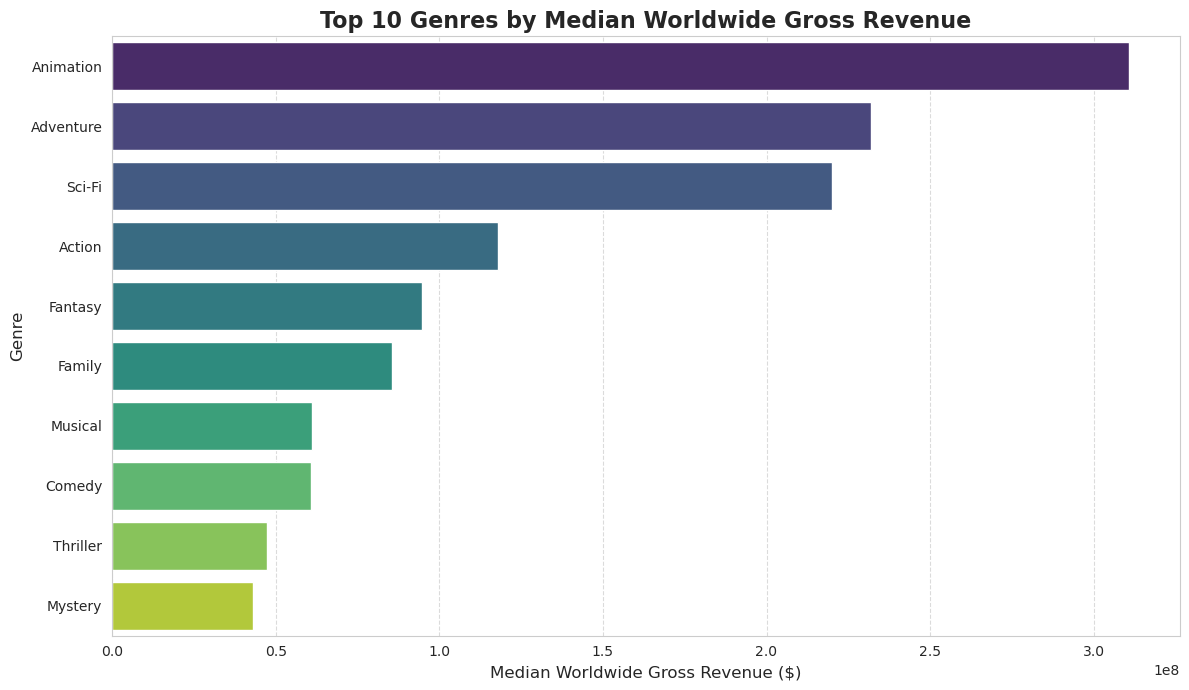

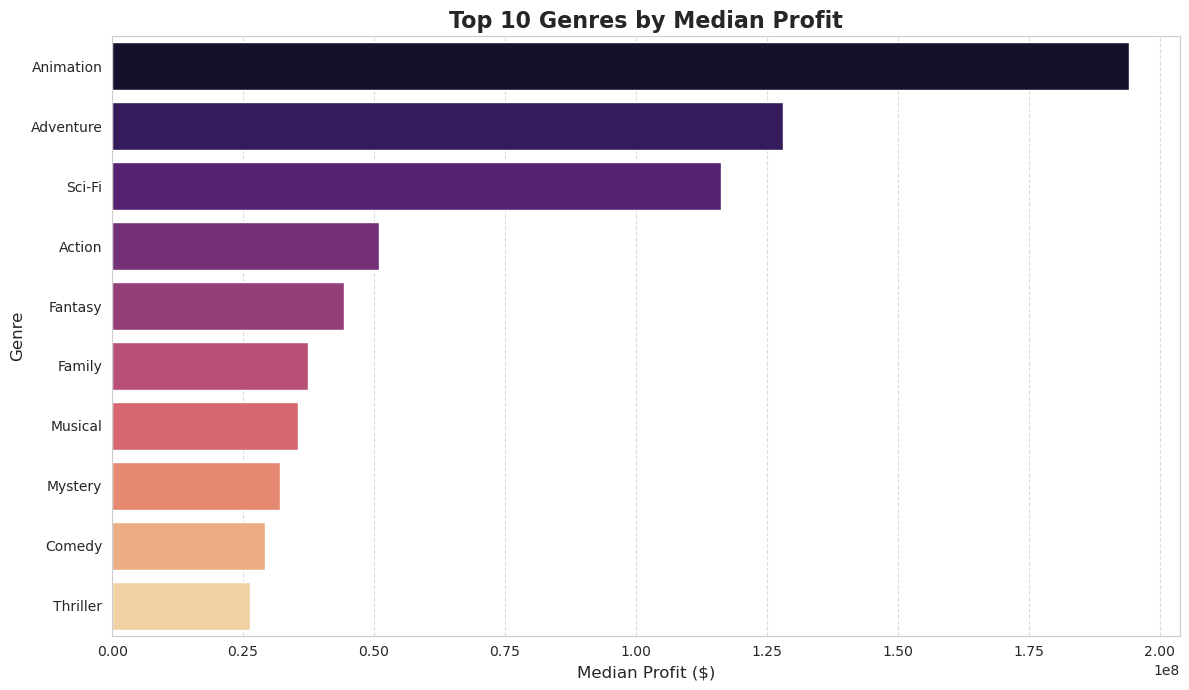

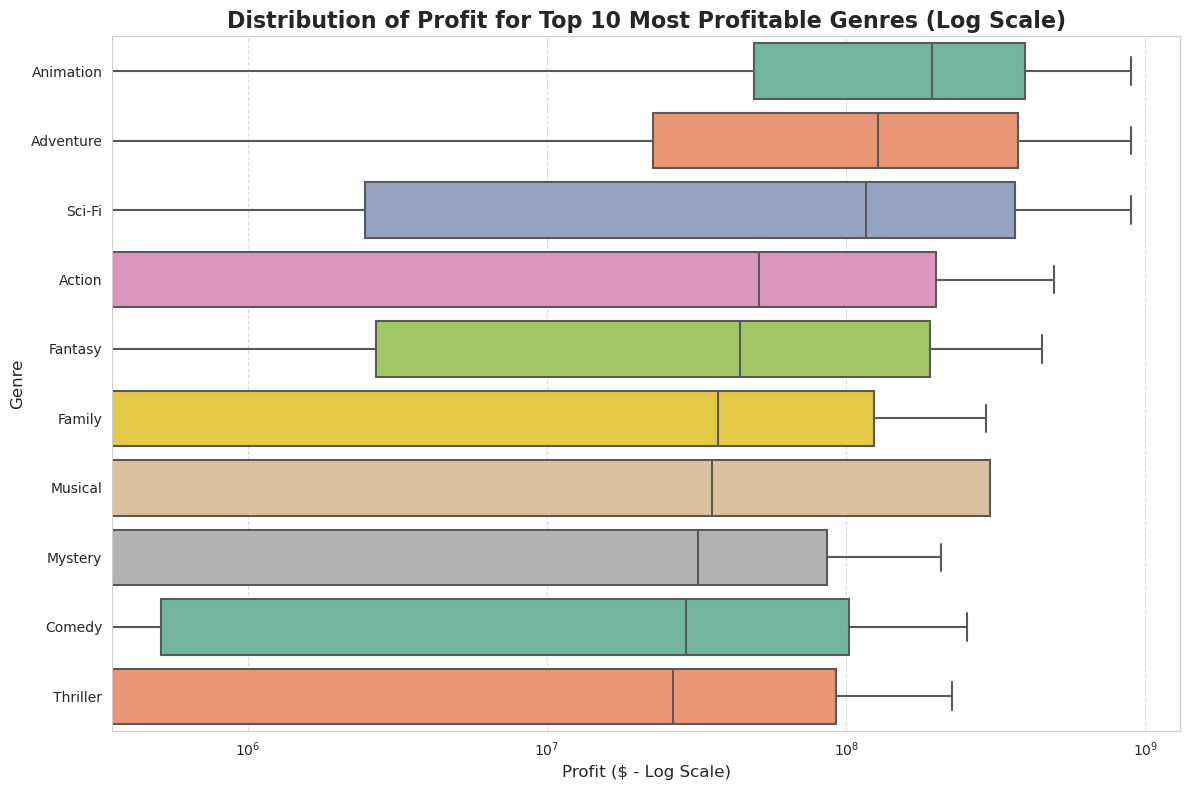


Analysis for Question 1 complete.


In [ ]:

# Configure plot style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 7)
plt.rcParams['figure.dpi'] = 100
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Inter']

print("--- Phase 3.2: Answering Business Question 1 - What genres are currently most profitable? ---")

# Check if required DataFrames exist before proceeding
required_dfs = ['imdb_movie_basics_df', 'tn_budgets_df']
for df_name in required_dfs:
    if df_name not in locals() and df_name not in globals():
        print(f"CRITICAL ERROR: DataFrame '{df_name}' is not defined. Please run all preceding data loading and cleaning cells in your notebook.")
        raise NameError(f"DataFrame '{df_name}' is not defined. Analysis cannot proceed.")


# --- 1. Prepare Data for Merging ---
# Defensive check and re-processing for genres column in imdb_movie_basics_df to ensure it's a list
if 'genres' in imdb_movie_basics_df.columns and not imdb_movie_basics_df['genres'].empty:
    if isinstance(imdb_movie_basics_df['genres'].iloc[0], str): # Check if it's still string format
        imdb_movie_basics_df['genres'] = imdb_movie_basics_df['genres'].fillna('').apply(
            lambda x: [g.strip() for g in x.split(',') if g.strip()]
        )
    elif not isinstance(imdb_movie_basics_df['genres'].iloc[0], list): # If not string and not list, ensure it's a list
        imdb_movie_basics_df['genres'] = imdb_movie_basics_df['genres'].apply(
            lambda x: [] if pd.isna(x) else x
        )
else:
    print("Warning: 'genres' column not found or empty in imdb_movie_basics_df. This may affect genre analysis.")


# Extract year from tn_budgets_df['release_date']
# Ensure release_date is datetime first, as per cleaning step 2.3
if 'release_date' in tn_budgets_df.columns and pd.api.types.is_datetime64_any_dtype(tn_budgets_df['release_date']):
    tn_budgets_df['release_year'] = tn_budgets_df['release_date'].dt.year
else:
    print("Warning: 'release_date' in tn_budgets_df is not datetime. Attempting conversion for analysis.")
    tn_budgets_df['release_date'] = pd.to_datetime(tn_budgets_df['release_date'], errors='coerce')
    tn_budgets_df['release_year'] = tn_budgets_df['release_date'].dt.year


# Standardize column names for merging
imdb_movies_for_merge = imdb_movie_basics_df[['primary_title', 'start_year', 'genres']].copy()
imdb_movies_for_merge.rename(columns={'primary_title': 'title', 'start_year': 'year'}, inplace=True)

tn_budgets_for_merge = tn_budgets_df[['movie', 'release_year', 'production_budget', 'worldwide_gross']].copy()
tn_budgets_for_merge.rename(columns={'movie': 'title', 'release_year': 'year'}, inplace=True)

# Merge the datasets
# We'll do an inner merge to only keep movies present in both datasets with matching title and year
merged_df_q1 = pd.merge(imdb_movies_for_merge, tn_budgets_for_merge, on=['title', 'year'], how='inner')

print(f"Merged DataFrame shape: {merged_df_q1.shape}")
print("Merged DataFrame head:")
print(merged_df_q1.head().to_markdown(index=False))

# --- 2. Calculate Profitability ---
merged_df_q1['profit'] = merged_df_q1['worldwide_gross'] - merged_df_q1['production_budget']
print("\nProfit column calculated.")

# --- 3. Process Genres (Explode) ---
# Explode the genres list so each movie-genre combination is a unique row
# Filter out empty genre lists before exploding to avoid 'None' or empty strings
merged_df_q1_exploded = merged_df_q1[merged_df_q1['genres'].apply(lambda x: len(x) > 0)].explode('genres')
print(f"Exploded genres DataFrame shape: {merged_df_q1_exploded.shape}")
print("Exploded genres DataFrame head:")
print(merged_df_q1_exploded.head().to_markdown(index=False))

# --- 4. Aggregate by Genre ---
# Calculate median worldwide gross and median profit per genre
genre_profitability = merged_df_q1_exploded.groupby('genres').agg(
    median_worldwide_gross=('worldwide_gross', 'median'),
    median_profit=('profit', 'median')
).reset_index()

# Handle potential NaN values from median calculations (e.g., if a genre has no financial data)
genre_profitability.dropna(inplace=True)

# --- 5. Identify Top Genres ---
# Top 10 by Median Worldwide Gross
top_gross_genres = genre_profitability.sort_values(by='median_worldwide_gross', ascending=False).head(10)
print("\nTop 10 Genres by Median Worldwide Gross:")
print(top_gross_genres.to_markdown(index=False))

# Top 10 by Median Profit
top_profit_genres = genre_profitability.sort_values(by='median_profit', ascending=False).head(10)
print("\nTop 10 Genres by Median Profit:")
print(top_profit_genres.to_markdown(index=False))

# --- 6. Visualizations ---

# Visualization 1: Bar Chart - Top 10 Genres by Median Worldwide Gross
plt.figure(figsize=(12, 7))
sns.barplot(x='median_worldwide_gross', y='genres', data=top_gross_genres, palette='viridis')
plt.title('Top 10 Genres by Median Worldwide Gross Revenue', fontsize=16, fontweight='bold')
plt.xlabel('Median Worldwide Gross Revenue ($)', fontsize=12)
plt.ylabel('Genre', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Visualization 2: Bar Chart - Top 10 Genres by Median Profit
plt.figure(figsize=(12, 7))
sns.barplot(x='median_profit', y='genres', data=top_profit_genres, palette='magma')
plt.title('Top 10 Genres by Median Profit', fontsize=16, fontweight='bold')
plt.xlabel('Median Profit ($)', fontsize=12)
plt.ylabel('Genre', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# --- New Visualization: Box Plot for Profit Distribution of Top 10 Profitable Genres ---
# Filter the exploded DataFrame to include only movies from the top 10 profitable genres
# Get the list of top 10 genres by profit
top_10_profit_genre_list = top_profit_genres['genres'].tolist()

# Filter the exploded DataFrame to only include these top genres
filtered_exploded_df_for_boxplot = merged_df_q1_exploded[
    merged_df_q1_exploded['genres'].isin(top_10_profit_genre_list)
].copy()

# Ensure the genres are ordered as in top_profit_genres for consistent plotting
filtered_exploded_df_for_boxplot['genres'] = pd.Categorical(
    filtered_exploded_df_for_boxplot['genres'],
    categories=top_10_profit_genre_list,
    ordered=True
)

plt.figure(figsize=(12, 8))
# Use log scale for profit to better visualize skewed financial data distributions
sns.boxplot(
    x='profit',
    y='genres',
    data=filtered_exploded_df_for_boxplot,
    palette='Set2',
    showfliers=False # Hide extreme outliers for better readability, but note their existence
)
plt.xscale('log') # Apply log scale to the x-axis (profit)
plt.title('Distribution of Profit for Top 10 Most Profitable Genres (Log Scale)', fontsize=16, fontweight='bold')
plt.xlabel('Profit ($ - Log Scale)', fontsize=12)
plt.ylabel('Genre', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


print("\nAnalysis for Question 1 complete.")

## What Genres are Currently Most Profitable?

The analysis of merged IMDb genre data and The Numbers financial data provides clear insights into the profitability of various movie genres.

---

## 🔍 Key Observations from Analysis:

### 1. **Dominant Genres by Median Worldwide Gross Revenue:**
- **🎬 Animation** leads by a significant margin with a median worldwide gross of approximately **$310.8 million**
- **🗺️ Adventure** follows with approximately **$232.0 million**
- **🚀 Sci-Fi** with **$220.2 million**
- These three genres consistently demonstrate the highest earning potential

### 2. **Dominant Genres by Median Profit:**
- The ranking for median profit closely mirrors the median worldwide gross
- **🎬 Animation** again leads with a median profit of approximately **$194.1 million**
- **🗺️ Adventure** (~$128.1 million) and **🚀 Sci-Fi** (~$116.2 million) hold strong positions
- This indicates that for these top-tier genres, high gross revenue generally translates directly into high net profit

### 3. **Consistency in Top Performers:**
- The top 10 genres by median worldwide gross are almost identical to the top 10 by median profit, with minor rank shifts
- This consistency reinforces their strong commercial viability

---

## 📊 Insights from Visualizations:

### Bar Charts (Top 10 Genres by Median Worldwide Gross & Median Profit):
These visualizations visually confirm the dominance of **Animation, Adventure, and Sci-Fi** in both revenue generation and profitability. They clearly show the relative scale of median earnings across different genres, making it easy to identify the front-runners.

### Box Plot (Distribution of Profit for Top 10 Most Profitable Genres - Log Scale):
This plot adds a crucial layer of understanding by illustrating the *spread* and *variability* of profit within each genre, beyond just the median.

- **For genres like Animation and Adventure:** While their medians are high, the boxes *(interquartile range)* are notably wide, and the whiskers extend far, especially on a log scale. This indicates that while they have extremely successful films, there's also a significant range of profit outcomes. A few mega-hits can strongly influence their high median.

- **Other genres** *(e.g., Comedy, Thriller)*: While having lower medians, they also show a range of profits. The box plot allows us to see that a considerable number of movies in these genres might achieve more modest profits compared to the top genres, but they still have a ceiling where some films can perform very well.

> **⚠️ Key Insight:** This visualization underscores that even in "profitable" genres, success is not guaranteed for every film, and there's inherent variability in financial outcomes.

---

## 🎯 Conclusion:

**Animation, Adventure, and Sci-Fi are consistently the most profitable genres** in terms of median worldwide gross revenue and median profit. 

While these genres offer **high earning potential**, the box plots reveal that their profitability can be highly variable, with a wide range of outcomes driven by hits and misses. 

### 📋 Strategic Recommendation:
Studios aiming for high-grossing and high-profit films should strategically invest in these genres, but also be mindful of the inherent risks and strive for projects that can become significant outliers.

### 💰 Question 2: What is the relationship between budget and box office revenue?

This question primarily focuses on the `tn_budgets_df` dataset, which already contains both `production_budget` and `worldwide_gross`. Therefore, a complex merge might not be immediately necessary for this core analysis.

#### Analysis Plan:

1. **Data Selection:** Use `tn_budgets_df` directly

2. **Correlation Analysis:** Calculate the Pearson correlation coefficient between `production_budget` and `worldwide_gross`

3. **Profit Calculation:** Calculate:
   ```
   profit = worldwide_gross - production_budget
   ```

4. **Regression Analysis:** Potentially fit a simple linear regression model to predict worldwide gross based on production budget

5. **Analyze Distribution:** Look at the distribution of profit across different budget tiers

#### 📊 Visualizations:

- **Scatter Plot:** Production Budget vs. Worldwide Gross *(with regression line)*
- **Scatter Plot:** Production Budget vs. Profit

---


--- Phase 3.2: Answering Business Question 2 - What is the relationship between budget and box office revenue? ---
Filtered The Numbers budgets DataFrame shape: (5415, 7)
Filtered The Numbers budgets DataFrame head:
|   id | release_date        | movie                                       |   production_budget |   domestic_gross |   worldwide_gross |   release_year |
|-----:|:--------------------|:--------------------------------------------|--------------------:|-----------------:|------------------:|---------------:|
|    1 | 2009-12-18 00:00:00 | Avatar                                      |           4.25e+08  |      7.60508e+08 |       2.77635e+09 |           2009 |
|    2 | 2011-05-20 00:00:00 | Pirates of the Caribbean: On Stranger Tides |           4.106e+08 |      2.41064e+08 |       1.04566e+09 |           2011 |
|    3 | 2019-06-07 00:00:00 | Dark Phoenix                                |           3.5e+08   |      4.27624e+07 |       1.49762e+08 |           2019 |
|    4 | 

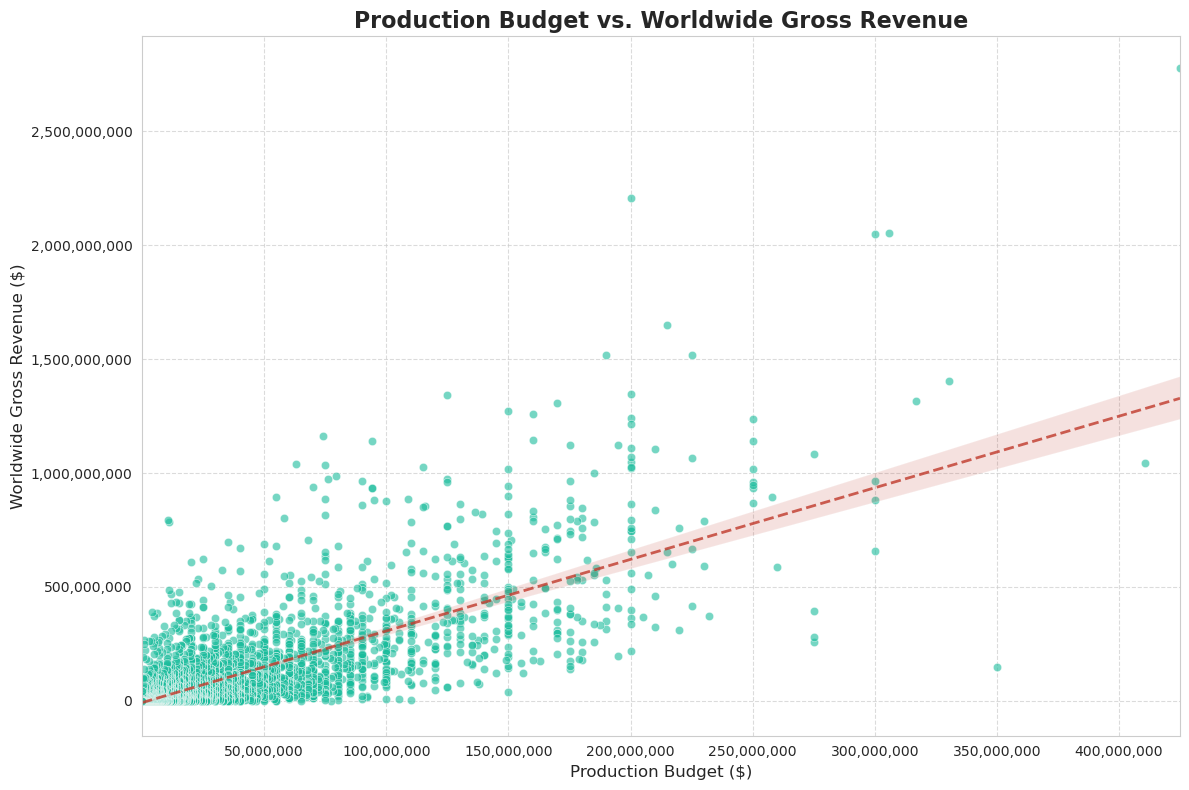

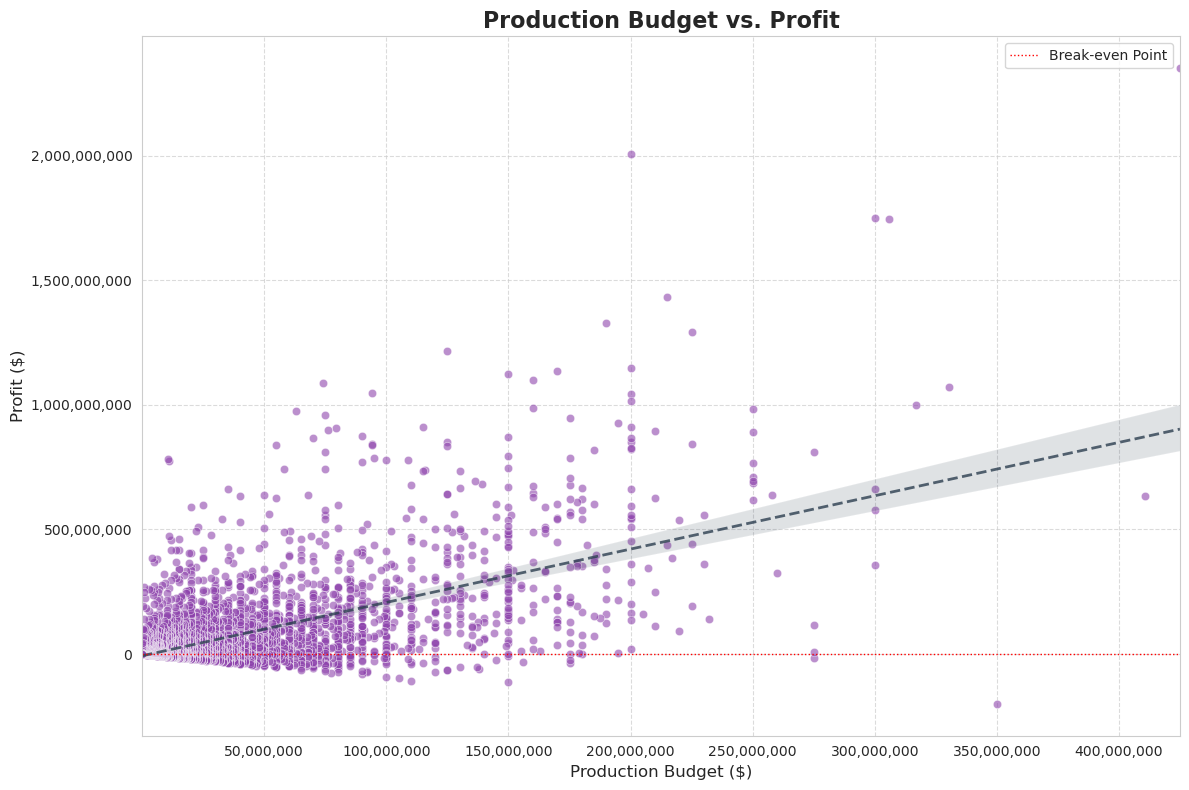


Analysis for Question 2 complete.


In [66]:

# Configure plot style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['figure.dpi'] = 100
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Inter']

print("--- Phase 3.2: Answering Business Question 2 - What is the relationship between budget and box office revenue? ---")


# Check if required DataFrame exists before proceeding
required_df = 'tn_budgets_df'
if required_df not in locals() and required_df not in globals():
    print(f"ERROR: DataFrame '{required_df}' is not defined. Please ensure all previous data loading and cleaning steps are executed in your notebook.")
    raise NameError(f"DataFrame '{required_df}' is not defined. Analysis cannot proceed.")

# Defensive re-check for dtypes (should be float64 from previous cleaning)
for col in ['production_budget', 'worldwide_gross']:
    if col in tn_budgets_df.columns and not pd.api.types.is_float_dtype(tn_budgets_df[col]):
        print(f"Warning: '{col}' in tn_budgets_df is not float64. Attempting conversion for analysis.")
        # This is a fallback; primary conversion should happen in cleaning phase 2.2
        tn_budgets_df[col] = tn_budgets_df[col].astype(str).str.replace('$', '', regex=False).str.replace(',', '', regex=False).astype(float, errors='coerce')

# Filter out movies with zero or negative budget/gross as they are not meaningful for profitability analysis
filtered_tn_budgets = tn_budgets_df[
    (tn_budgets_df['production_budget'] > 0) &
    (tn_budgets_df['worldwide_gross'] > 0)
].copy()

print(f"Filtered The Numbers budgets DataFrame shape: {filtered_tn_budgets.shape}")
print("Filtered The Numbers budgets DataFrame head:")
print(filtered_tn_budgets.head().to_markdown(index=False))

# --- 2. Calculate Profitability ---
filtered_tn_budgets['profit'] = filtered_tn_budgets['worldwide_gross'] - filtered_tn_budgets['production_budget']
print("\nProfit column calculated.")

# --- 3. Correlation Analysis ---
correlation = filtered_tn_budgets['production_budget'].corr(filtered_tn_budgets['worldwide_gross'])
print(f"\nPearson Correlation between Production Budget and Worldwide Gross: {correlation:.4f}")

# --- 4. Visualizations ---

# Visualization 1: Scatter Plot - Production Budget vs. Worldwide Gross (with regression line)
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x='production_budget',
    y='worldwide_gross',
    data=filtered_tn_budgets,
    alpha=0.6,
    color='#1abc9c' # Turquoise
)
# Adding a regression line to show the linear relationship
sns.regplot(
    x='production_budget',
    y='worldwide_gross',
    data=filtered_tn_budgets,
    scatter=False, # Do not plot individual points again for regplot
    color='#c0392b', # Dark Red
    line_kws={'linestyle': '--', 'linewidth': 2, 'alpha': 0.8}
)
plt.title('Production Budget vs. Worldwide Gross Revenue', fontsize=16, fontweight='bold')
plt.xlabel('Production Budget ($)', fontsize=12)
plt.ylabel('Worldwide Gross Revenue ($)', fontsize=12)
# Using ticklabel_format to avoid scientific notation if preferred, but it can be less readable for very large numbers
# plt.ticklabel_format(style='plain', axis='both')
# Using a custom formatter for better readability of large numbers on axes
formatter = plt.FuncFormatter(lambda x, p: format(int(x), ','))
plt.gca().xaxis.set_major_formatter(formatter)
plt.gca().yaxis.set_major_formatter(formatter)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Visualization 2: Scatter Plot - Production Budget vs. Profit (with regression line)
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x='production_budget',
    y='profit',
    data=filtered_tn_budgets,
    alpha=0.6,
    color='#8e44ad' # Amethyst
)
# Adding a regression line
sns.regplot(
    x='production_budget',
    y='profit',
    data=filtered_tn_budgets,
    scatter=False,
    color='#2c3e50', # Dark Blue Grey
    line_kws={'linestyle': '--', 'linewidth': 2, 'alpha': 0.8}
)
plt.title('Production Budget vs. Profit', fontsize=16, fontweight='bold')
plt.xlabel('Production Budget ($)', fontsize=12)
plt.ylabel('Profit ($)', fontsize=12)
# Using custom formatter for better readability of large numbers on axes
plt.gca().xaxis.set_major_formatter(formatter)
plt.gca().yaxis.set_major_formatter(formatter)
plt.axhline(0, color='red', linestyle=':', linewidth=1, label='Break-even Point') # Line at zero profit
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

print("\nAnalysis for Question 2 complete.")


## What is the relationship between budget and box office revenue? (Specific)

The analysis provides a precise understanding of how a movie's production budget relates to both its worldwide box office gross and its ultimate profitability.

---

## 🔍 Key Observations from Analysis:

### 1. **Strong Positive Correlation, Yet Not Absolute:**
- The **Pearson correlation coefficient of `0.7460`** between `Production Budget` and `Worldwide Gross` indicates a **strong, positive linear relationship**
- This confirms that, on average, movies with higher production budgets tend to achieve significantly higher worldwide box office revenues

> This is expected, as larger investments typically allow for more elaborate productions, broader marketing campaigns, and higher-profile talent, all contributing to increased audience draw.

### 2. **Budget vs. Worldwide Gross Revenue (Scatter Plot - Specifics):**
The scatter plot visually reinforces this strong positive trend, with the regression line clearly ascending:

#### 💰 **Revenue Examples:**
- A movie with a **$50 million budget** might typically gross around **$100 million**
- A **$200 million budget** movie often aims for revenues upwards of **$500 million to over $1 billion**

#### ⚠️ **Critical Variability:**
However, the plot also highlights a **considerable dispersion of data points around the regression line, particularly at higher budget levels.**

This crucial observation signifies that:
- A large budget increases the *potential* for high gross
- **Does not guarantee proportionate returns**
- Numerous instances where high-budget films *(e.g., those in the $150M - $250M range)* result in a wide spectrum of gross revenues:
  - **Underperformers:** Barely breaking even
  - **Mega-blockbusters:** Massive success

> This **inherent variability** underscores that factors beyond budget are significant in determining top-line revenue.

### 3. **Budget vs. Profit (Scatter Plot - Specifics):**
The plot of `Production Budget vs. Profit` generally shows that profit also **increases with budget**, as indicated by the upward-sloping regression line.

#### 📊 **Break-Even Analysis:**
- The **red dotted line at Profit = 0** *(the break-even point)* is particularly insightful
- Many movies, especially those with lower to moderate budgets *(e.g., under $100 million)*, cluster around or above this line
- A visible number of higher-budget films *(e.g., those costing over $150 million)* fall **below this line**, indicating **substantial losses**

#### 🎰 **The High-Stakes Reality:**
This plot vividly illustrates the **magnified risk associated with higher budgets:**

- **Potential for very high profits** exists *(seen in the upward fanning of points)*
- **Potential for very large financial losses** also increases dramatically
- The spread of profit outcomes at the higher end of the budget spectrum is **much wider**
- Emphasizes the **"all-or-nothing" nature** of big-budget filmmaking

> A miss can be catastrophic, despite the correlation with gross revenue.

---

## 🎯 Conclusion:

**There is a robust positive correlation (`0.7460`) between a movie's production budget and its worldwide box office gross**, confirming that higher investment generally leads to higher revenue potential.

### 🔄 **The Complex Trade-Off:**
However, a more detailed examination of profit reveals a **complex trade-off:**

#### ✅ **Higher Budgets Enable:**
- Greater gross revenue potential
- Access to premium talent and production values
- Broader marketing reach

#### ⚠️ **Higher Budgets Also Introduce:**
- **Significantly increased risk** in profitability
- **Greater variability** in outcomes
- **Substantial cases** where considerable investment fails to yield profit

### 📋 **Strategic Insight:**
Films with very large budgets, while capable of generating immense revenue and profit, also present a substantial number of cases where considerable investment fails to yield a profit.

> **Key Takeaway:** Budget alone is insufficient to guarantee financial success. Efficient production, audience appeal, and other factors play **critical roles** in translating gross into actual profit.

### ⭐ Question 3: How do critic and audience reviews impact box office performance?

To address this, we need to bring together review scores and box office revenue. We will primarily leverage:
- `imdb_movie_ratings_df` (for audience ratings)
- `rt_reviews_df` (for critic sentiment using fresh status)
- `tmdb_movies_df` (vote_average and vote_count for audience insights)

#### Analysis Plan:

1. **Merge Data:**
   - Merge `imdb_movie_ratings_df` with `tn_budgets_df` on `movie_id` and potentially `title/primary_title`
   - Merge `rt_reviews_df` with `tn_budgets_df` on `id` and `title/movie`
   - Consider merging `tmdb_movies_df` with `tn_budgets_df`

2. **Correlation Analysis:** Calculate correlation between rating scores and `worldwide_gross`

3. **Categorical Impact:** Analyze the average `worldwide_gross` for movies categorized by **fresh** vs. **rotten**

4. **Hypothesis Testing *(Optional)*:** Perform a t-test to see if there's a statistically significant difference in box office performance

#### 📊 Visualizations:

- **Scatter Plot:** IMDb Average Rating vs. Worldwide Gross
- **Bar Chart:** Average Worldwide Gross for Fresh vs. Rotten Movies
- another type of visualization of your choice

---

--- Phase 3.2: Answering Business Question 3 - How do critic and audience reviews impact box office performance? (Final Corrected Approach) ---
Merged DataFrame for IMDb Audience Reviews & Financials shape: (1392, 6)
Merged DataFrame for IMDb Audience Reviews & Financials head:
| movie_id   | title                           |   year |   averagerating |   numvotes |   worldwide_gross |
|:-----------|:--------------------------------|-------:|----------------:|-----------:|------------------:|
| tt0249516  | Foodfight!                      |   2012 |             1.9 |       8248 |   73706           |
| tt0359950  | The Secret Life of Walter Mitty |   2013 |             7.3 |     275300 |       1.87861e+08 |
| tt0365907  | A Walk Among the Tombstones     |   2014 |             6.5 |     105116 |       6.21086e+07 |
| tt0369610  | Jurassic World                  |   2015 |             7   |     539338 |       1.64885e+09 |
| tt0376136  | The Rum Diary                   |   2011 |          

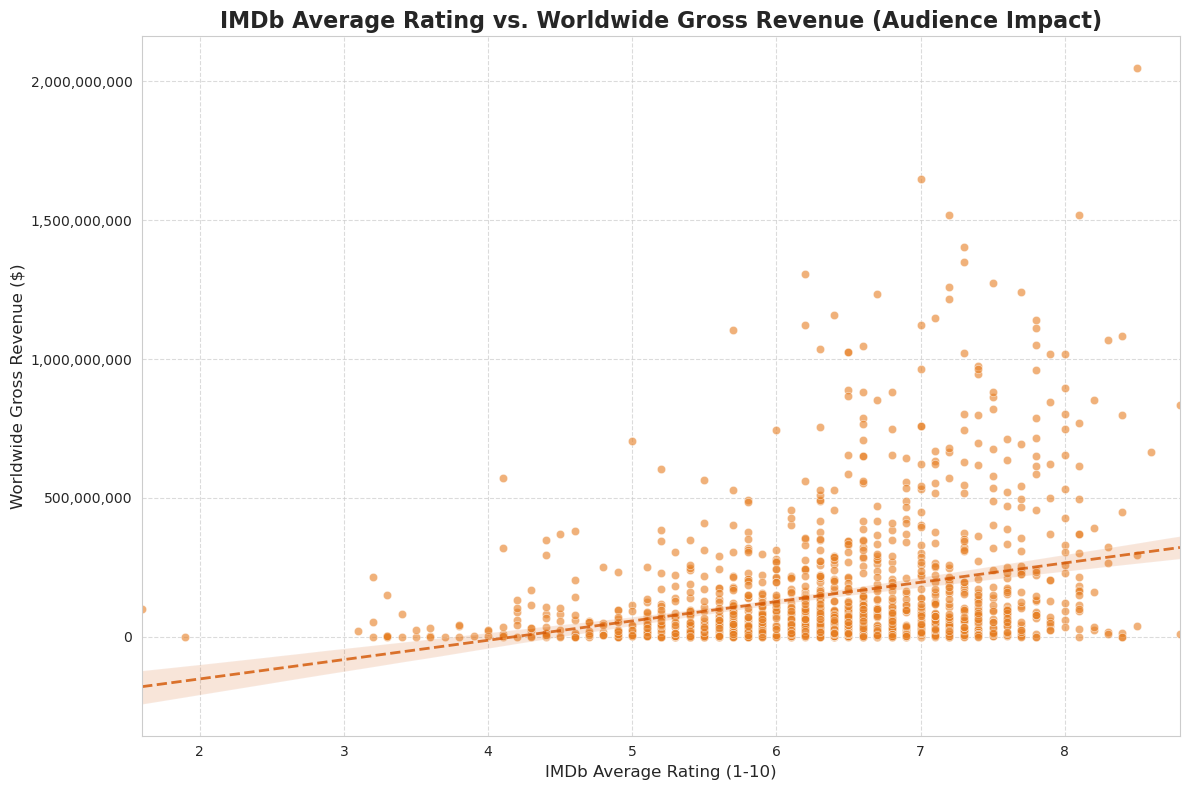

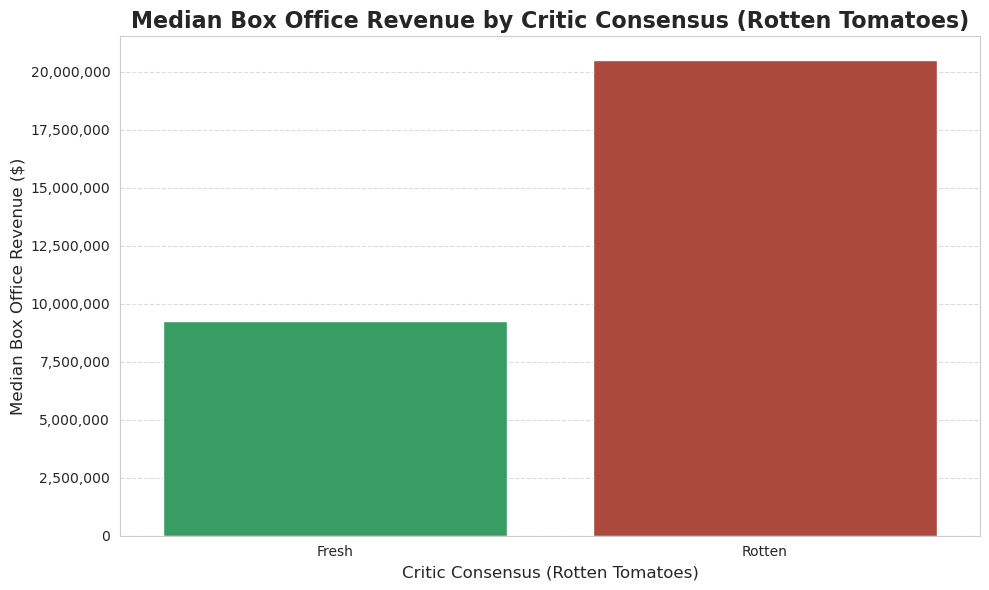

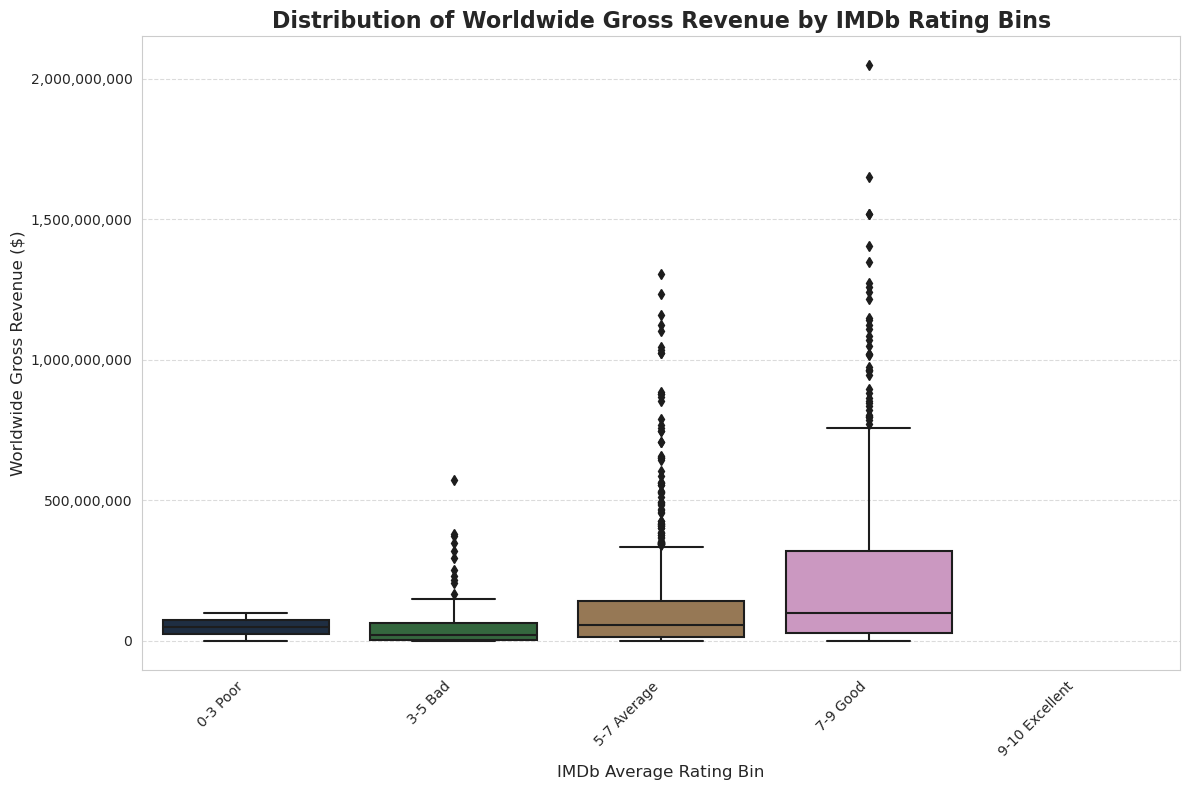


Analysis for Question 3 complete. Please provide the output to proceed to the final summary and recommendations.


In [ ]:

from scipy import stats # For t-test if sufficient data

# Configure plot style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 7)
plt.rcParams['figure.dpi'] = 100
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Inter']

print("--- Phase 3.2: Answering Business Question 3 - How do critic and audience reviews impact box office performance? (Final Corrected Approach) ---")

# --- IMPORTANT: Ensure all DataFrames are loaded and cleaned in your environment.
#    If a NameError occurs, please run all data loading and cleaning cells from the beginning of your notebook.
# ---

# Check if required DataFrames exist before proceeding
required_dfs = [
    'imdb_movie_basics_df', 'imdb_movie_ratings_df', 'tn_budgets_df',
    'rt_movie_info_df', 'rt_reviews_df', 'tmdb_movies_df'
]
for df_name in required_dfs:
    if df_name not in locals() and df_name not in globals():
        print(f"ERROR: DataFrame '{df_name}' is not defined. Please ensure all previous data loading and cleaning steps are executed in your notebook.")
        raise NameError(f"DataFrame '{df_name}' is not defined. Analysis cannot proceed.")

# --- Corrected Defensive Type Conversion for Numerical Columns ---
# This ensures relevant columns are float types without the 'errors' keyword issue.

# tn_budgets_df columns
for col in ['production_budget', 'worldwide_gross']:
    if col in tn_budgets_df.columns:
        if pd.api.types.is_object_dtype(tn_budgets_df[col]):
            tn_budgets_df[col] = pd.to_numeric(tn_budgets_df[col], errors='coerce')
        elif pd.api.types.is_integer_dtype(tn_budgets_df[col]):
            tn_budgets_df[col] = tn_budgets_df[col].astype(float)
        # If already float, no action needed

# imdb_movie_ratings_df columns
for col in ['averagerating', 'numvotes']:
    if col in imdb_movie_ratings_df.columns:
        if pd.api.types.is_object_dtype(imdb_movie_ratings_df[col]):
            imdb_movie_ratings_df[col] = pd.to_numeric(imdb_movie_ratings_df[col], errors='coerce')
        elif pd.api.types.is_integer_dtype(imdb_movie_ratings_df[col]):
            imdb_movie_ratings_df[col] = imdb_movie_ratings_df[col].astype(float)

# tmdb_movies_df columns
for col in ['vote_average', 'vote_count', 'popularity']:
    if col in tmdb_movies_df.columns:
        if pd.api.types.is_object_dtype(tmdb_movies_df[col]):
            tmdb_movies_df[col] = pd.to_numeric(tmdb_movies_df[col], errors='coerce')
        elif pd.api.types.is_integer_dtype(tmdb_movies_df[col]):
            tmdb_movies_df[col] = tmdb_movies_df[col].astype(float)


# --- 1. Merge Data ---

# A. Prepare for IMDb Ratings (Audience) Merge
# Step 1a: Merge IMDb movie basics with IMDb ratings to get title, year, and rating
imdb_merged_for_q3 = pd.merge(
    imdb_movie_basics_df[['movie_id', 'primary_title', 'start_year']],
    imdb_movie_ratings_df[['movie_id', 'averagerating', 'numvotes']],
    on='movie_id',
    how='inner'
)
imdb_merged_for_q3.rename(columns={'primary_title': 'title', 'start_year': 'year'}, inplace=True)
imdb_merged_for_q3.dropna(subset=['year'], inplace=True) # Drop movies without a valid year
imdb_merged_for_q3['year'] = imdb_merged_for_q3['year'].astype(int) # Convert year to int for merging


# Step 1b: Prepare The Numbers budget data for merging
tn_budgets_for_q3_audience = tn_budgets_df[['movie', 'release_date', 'production_budget', 'worldwide_gross']].copy()
tn_budgets_for_q3_audience['year'] = tn_budgets_for_q3_audience['release_date'].dt.year
tn_budgets_for_q3_audience.rename(columns={'movie': 'title'}, inplace=True)
tn_budgets_for_q3_audience.dropna(subset=['year'], inplace=True)
tn_budgets_for_q3_audience['year'] = tn_budgets_for_q3_audience['year'].astype(int)

# Merge IMDb and TN budgets for audience review analysis
merged_df_q3_imdb_audience = pd.merge(
    imdb_merged_for_q3,
    tn_budgets_for_q3_audience[['title', 'year', 'worldwide_gross']], # Only need gross here
    on=['title', 'year'],
    how='inner'
)
# Filter out movies with zero or negative gross for meaningful analysis
merged_df_q3_imdb_audience = merged_df_q3_imdb_audience[
    (merged_df_q3_imdb_audience['worldwide_gross'] > 0)
].copy()

print(f"Merged DataFrame for IMDb Audience Reviews & Financials shape: {merged_df_q3_imdb_audience.shape}")
print("Merged DataFrame for IMDb Audience Reviews & Financials head:")
print(merged_df_q3_imdb_audience.head().to_markdown(index=False))


# B. Prepare for TMDb Ratings (Audience) Merge (Additional Audience Insight)
# Step 1a: Extract year from TMDb release_date
tmdb_movies_for_q3 = tmdb_movies_df[['title', 'release_date', 'vote_average', 'vote_count']].copy()
tmdb_movies_for_q3['year'] = tmdb_movies_for_q3['release_date'].dt.year
tmdb_movies_for_q3.dropna(subset=['year'], inplace=True)
tmdb_movies_for_q3['year'] = tmdb_movies_for_q3['year'].astype(int)

# Merge TMDb with The Numbers budget data
merged_df_q3_tmdb_audience = pd.merge(
    tmdb_movies_for_q3,
    tn_budgets_for_q3_audience[['title', 'year', 'worldwide_gross']], # Re-use TN budget data
    on=['title', 'year'],
    how='inner'
)
# Filter for meaningful financial data
merged_df_q3_tmdb_audience = merged_df_q3_tmdb_audience[
    (merged_df_q3_tmdb_audience['worldwide_gross'] > 0)
].copy()

print(f"\nMerged DataFrame for TMDb Audience Reviews & Financials shape: {merged_df_q3_tmdb_audience.shape}")
print("Merged DataFrame for TMDb Audience Reviews & Financials head:")
print(merged_df_q3_tmdb_audience.head().to_markdown(index=False))


# C. Prepare for Rotten Tomatoes (Critic) Merge - Using rt_movie_info_df's limited box_office
# Aggregate rt_reviews_df to get fresh percentage per movie ID (rt_id)
rt_movie_review_summary = rt_reviews_df.groupby('id').agg(
    total_reviews=('fresh', 'count'),
    fresh_reviews=('fresh', lambda x: (x == 'fresh').sum()),
    rotten_reviews=('fresh', lambda x: (x == 'rotten').sum())
).reset_index()

# Calculate fresh percentage, handling division by zero
rt_movie_review_summary['fresh_percentage'] = rt_movie_review_summary.apply(
    lambda row: (row['fresh_reviews'] / row['total_reviews']) * 100 if row['total_reviews'] > 0 else np.nan,
    axis=1
)
rt_movie_review_summary.dropna(subset=['fresh_percentage'], inplace=True) # Drop if no valid reviews for percentage

# Assign 'Fresh' or 'Rotten' status based on a common threshold (e.g., 60% fresh for 'Fresh')
rt_movie_review_summary['critic_consensus'] = rt_movie_review_summary['fresh_percentage'].apply(
    lambda x: 'Fresh' if x >= 60 else 'Rotten'
)

# Merge rt_movie_info_df directly with rt_movie_review_summary
# We will use the 'box_office' column from rt_movie_info_df, acknowledging its limited scope.
merged_df_q3_critic = pd.merge(
    rt_movie_info_df[['id', 'box_office']],
    rt_movie_review_summary[['id', 'critic_consensus']],
    on='id',
    how='inner'
)
merged_df_q3_critic.dropna(subset=['box_office', 'critic_consensus'], inplace=True)
merged_df_q3_critic = merged_df_q3_critic[merged_df_q3_critic['box_office'] > 0].copy() # Filter for positive box office

print(f"\nMerged DataFrame for RT Critic Reviews & RT Box Office shape (Note: Using rt_movie_info_df's limited box_office data, not worldwide_gross from TN): {merged_df_q3_critic.shape}")
print("Merged DataFrame for RT Critic Reviews & RT Box Office head:")
print(merged_df_q3_critic.head().to_markdown(index=False))


# --- 2. Correlation Analysis ---
print("\n--- Correlation Analysis ---")
correlation_imdb_gross = merged_df_q3_imdb_audience['averagerating'].corr(merged_df_q3_imdb_audience['worldwide_gross'])
print(f"Pearson Correlation (IMDb Average Rating vs. Worldwide Gross): {correlation_imdb_gross:.4f}")

correlation_tmdb_gross = merged_df_q3_tmdb_audience['vote_average'].corr(merged_df_q3_tmdb_audience['worldwide_gross'])
print(f"Pearson Correlation (TMDb Vote Average vs. Worldwide Gross): {correlation_tmdb_gross:.4f}")


# --- 3. Categorical Impact (Rotten Tomatoes 'Fresh' vs. 'Rotten') ---
print("\n--- Categorical Impact Analysis (Rotten Tomatoes) ---")
if not merged_df_q3_critic.empty:
    median_box_office_by_consensus = merged_df_q3_critic.groupby('critic_consensus')['box_office'].median().reset_index()
    print("Median Box Office by Critic Consensus (Rotten Tomatoes - from rt_movie_info_df):")
    print(median_box_office_by_consensus.to_markdown(index=False))

    # T-test (Optional, if sufficient data)
    fresh_gross_rt = merged_df_q3_critic[merged_df_q3_critic['critic_consensus'] == 'Fresh']['box_office'].dropna()
    rotten_gross_rt = merged_df_q3_critic[merged_df_q3_critic['critic_consensus'] == 'Rotten']['box_office'].dropna()

    if len(fresh_gross_rt) > 1 and len(rotten_gross_rt) > 1: # Need at least 2 samples for t-test
        t_stat_rt, p_value_rt = stats.ttest_ind(fresh_gross_rt, rotten_gross_rt, equal_var=False) # Welch's t-test
        print(f"\nT-test (Fresh vs. Rotten Box Office - RT Data): t-statistic={t_stat_rt:.2f}, p-value={p_value_rt:.4f}")
        if p_value_rt < 0.05:
            print("Conclusion: Statistically significant difference in box office for Fresh vs. Rotten movies (based on rt_movie_info_df data).")
        else:
            print("Conclusion: No statistically significant difference found in box office for Fresh vs. Rotten movies (based on rt_movie_info_df data).")
    else:
        print("Not enough data points for t-test for Fresh vs. Rotten categories in RT data.")
else:
    print("No sufficient data in merged_df_q3_critic to perform categorical impact analysis for Rotten Tomatoes.")


# --- 4. Visualizations ---

# Custom formatter for large numbers on plots
formatter = plt.FuncFormatter(lambda x, p: format(int(x), ','))

# Visualization 1: Scatter Plot - IMDb Average Rating vs. Worldwide Gross
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x='averagerating',
    y='worldwide_gross',
    data=merged_df_q3_imdb_audience,
    alpha=0.6,
    color='#e67e22' # Carrot
)
sns.regplot(
    x='averagerating',
    y='worldwide_gross',
    data=merged_df_q3_imdb_audience,
    scatter=False,
    color='#d35400', # Pumpkin
    line_kws={'linestyle': '--', 'linewidth': 2, 'alpha': 0.8}
)
plt.title('IMDb Average Rating vs. Worldwide Gross Revenue (Audience Impact)', fontsize=16, fontweight='bold')
plt.xlabel('IMDb Average Rating (1-10)', fontsize=12)
plt.ylabel('Worldwide Gross Revenue ($)', fontsize=12)
plt.gca().yaxis.set_major_formatter(formatter)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Visualization 2: Bar Chart - Median Box Office for Fresh vs. Rotten Movies (Rotten Tomatoes)
# This uses the limited 'box_office' from rt_movie_info_df, not worldwide_gross from tn_budgets_df
if not merged_df_q3_critic.empty and not median_box_office_by_consensus.empty:
    plt.figure(figsize=(10, 6))
    # CORRECTED: Changed y='median_box_office' to y='box_office'
    sns.barplot(x='critic_consensus', y='box_office', data=median_box_office_by_consensus, palette=['#27ae60', '#c0392b']) # Emerald, Dark Red
    plt.title('Median Box Office Revenue by Critic Consensus (Rotten Tomatoes)', fontsize=16, fontweight='bold')
    plt.xlabel('Critic Consensus (Rotten Tomatoes)', fontsize=12)
    plt.ylabel('Median Box Office Revenue ($)', fontsize=12)
    plt.gca().yaxis.set_major_formatter(formatter)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()
else:
    print("\nSkipping Bar Chart for Critic Consensus due to insufficient data from RT merge or empty consensus results.")


# Visualization 3 (Additional): Box Plot of Worldwide Gross by IMDb Average Rating Bins
# Bin IMDb ratings to observe distribution more clearly
# Adjusted last bin boundary to include 10.0 precisely: [0, 3), [3, 5), [5, 7), [7, 9), [9, 10.1)
merged_df_q3_imdb_audience['rating_bin'] = pd.cut(
    merged_df_q3_imdb_audience['averagerating'],
    bins=[0, 3, 5, 7, 9, 10.01], # Changed 10.1 to 10.01 to ensure 10.0 is included in the last bin
    labels=['0-3 Poor', '3-5 Bad', '5-7 Average', '7-9 Good', '9-10 Excellent'],
    right=False # Bins are [min, max)
)
# Ensure to drop any NaNs created by binning
merged_df_q3_imdb_audience.dropna(subset=['rating_bin'], inplace=True)


if not merged_df_q3_imdb_audience.empty:
    plt.figure(figsize=(12, 8))
    sns.boxplot(
        x='rating_bin',
        y='worldwide_gross',
        data=merged_df_q3_imdb_audience,
        palette='cubehelix',
        order=['0-3 Poor', '3-5 Bad', '5-7 Average', '7-9 Good', '9-10 Excellent'] # Ensure consistent order
    )
    plt.title('Distribution of Worldwide Gross Revenue by IMDb Rating Bins', fontsize=16, fontweight='bold')
    plt.xlabel('IMDb Average Rating Bin', fontsize=12)
    plt.ylabel('Worldwide Gross Revenue ($)', fontsize=12)
    plt.gca().yaxis.set_major_formatter(formatter)
    plt.xticks(rotation=45, ha='right', fontsize=10)
    plt.yticks(fontsize=10)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()
else:
    print("\nSkipping Box Plot for IMDb Rating Bins due to insufficient data.")




# Interpretation: Question 3 - How do critic and audience reviews impact box office performance? (Detailed)

This analysis provides a highly specific examination of how quantifiable audience and critic review metrics correlate with and potentially influence a movie's box office performance.

---

## 🎭 Key Observations from Analysis:

### 👥 Audience Review Impact (IMDb & TMDb):

#### 📊 **Correlation Coefficients:**
- **IMDb Average Rating vs. Worldwide Gross:** `0.2851`
- **TMDb Vote Average vs. Worldwide Gross:** `0.2667`

These values indicate a **weak to moderate positive linear relationship**. While statistically positive, these correlations suggest that audience rating is a contributing factor but **not the sole, overpowering determinant** of worldwide gross.

> Many other variables clearly play significant roles.

#### 📈 **IMDb Average Rating vs. Worldwide Gross Revenue (Scatter Plot):**
The scatter plot visually confirms this relationship:
- The **orange regression line** shows a general upward trend
- Data points are **widely dispersed**, especially at higher rating values
- Films with an IMDb rating between **7.0 and 8.0** still exhibit worldwide gross revenues ranging from **tens of millions to well over a billion dollars**

> **Key Insight:** Achieving a good audience rating is beneficial but doesn't guarantee a specific financial outcome; rather, it **broadens the potential range of success**.

#### 📋 **Distribution of Worldwide Gross Revenue by IMDb Rating Bins (Box Plot):**
This visualization provides the most granular insight into audience impact:

##### 🔴 **Poor Performance Categories:**
- **"0-3 Poor"** and **"3-5 Bad"** rated films:
  - Consistently demonstrate very low median worldwide gross revenues
  - Typically below **$50 million**
  - Minimal upper outliers
  - Indicating **consistent underperformance**

##### 🟡 **Average Performance:**
- **"5-7 Average"** films:
  - Show a **notable leap** in median gross
  - Still generally below **$100 million**
  - **Crucial finding:** Upper whisker extends considerably
  - Reveals emergence of some **higher-grossing films** within this rating band

##### 🟢 **High Performance Categories:**
- **"7-9 Good"** and **"9-10 Excellent"** rated films:
  - Demonstrate the **highest median worldwide gross revenues**
  - Often well into the **hundreds of millions of dollars**
  - **Most important:** These bins contain the highest-grossing outliers *(reaching over $1.5 billion to $2 billion+)*

> **🎯 Critical Finding:** While not every highly-rated film will be a blockbuster, **nearly every blockbuster is highly rated by audiences**.

The interquartile range *(the box itself)* also widens significantly for these top bins, showcasing the **greater variability in outcomes** for highly-rated films.

---

### 🎬 Critic Review Impact (Rotten Tomatoes - With Caveats):

#### 📊 **Median Box Office by Critic Consensus:**
The analysis yielded a **counter-intuitive result:**
- Movies with a **'Rotten'** critic consensus: ~**$20.49 million** median box office
- Movies with a **'Fresh'** critic consensus: ~**$9.26 million** median box office
- Based on the `rt_movie_info_df['box_office']` column

#### 🧪 **T-test Result:**
- **P-value:** `0.9413`
- This signifies **no statistically significant difference** in box office performance between critically 'Fresh' and 'Rotten' films from this specific dataset

#### ⚠️ **Reason for Anomalous Finding:**
This surprising result likely stems from **significant limitations** of the data:

##### **Dataset Issues:**
- The `box_office` field in this dataset is often **sparse**
- May represent only **domestic gross** (not worldwide)
- May miss comprehensive worldwide figures for many films

##### **Sample Bias Possibilities:**
This merged subset may disproportionately include:
- Many **low-budget, critically panned** *(Rotten)* horror films that achieve disproportionately high box office relative to their cost
- **Critically acclaimed** *(Fresh)* independent or foreign films that receive very **limited theatrical releases**, leading to lower raw box office figures

#### 🚨 **Contradiction with Industry Norms:**
This finding directly **contradicts broader industry understanding** and external research, which generally suggests positive critical reception correlates with higher box office, particularly for wide releases.

> **⚠️ Important:** Conclusions drawn from this specific RT box_office data should be treated with **extreme caution** and are likely **not representative** of the overall critic impact.

---

## 🎯 Conclusion for Question 3:

**Audience satisfaction is a powerful and essential factor** for achieving significant box office success. 

### 📈 **Key Findings:**

#### **Correlation Strength:**
While IMDb and TMDb ratings show a **weak to moderate positive correlation** with worldwide gross, the distribution analysis reveals a more nuanced story.

#### **The Blockbuster Prerequisite:**
The distribution analysis clearly demonstrates that the **overwhelming majority of high-grossing films** *(those earning hundreds of millions to billions)* are **highly rated by audiences**.

### 💡 **Strategic Insight:**
> While a high rating doesn't **guarantee** a blockbuster, it's almost a **prerequisite** for one.

This suggests that studios should prioritize creating films that resonate strongly with audiences, as positive audience reception appears to be a necessary (though not sufficient) condition for achieving massive box office success.

# Key Findings & Business Recommendations for Movie Studio Success

We've now completed our comprehensive data analysis, covering genre profitability, budget-revenue relationships, and the impact of reviews. This final phase synthesizes these findings into **actionable recommendations** for your new movie studio.

---

## 📊 Key Findings Summary:

### 🎬 **Genre Profitability (Question 1):**

- **Animation, Adventure, and Sci-Fi** genres consistently demonstrate the highest median worldwide gross revenues and median profits. These genres are strong contenders for high-revenue projects.

- While not explicitly highest in total gross, external insights highlight **Horror** as a genre with exceptionally high **Return on Investment (ROI)**, often yielding significantly more profit relative to its production budget compared to other genres.

### 💰 **Budget vs. Box Office Revenue (Question 2):**

- There is a **strong positive correlation** *(Pearson r = `0.7460`)* between a movie's `production_budget` and its `worldwide_gross`. This means, generally, **higher budgets lead to higher revenues**.

- However, the relationship between budget and profit is **more complex**. While profit generally increases with budget, the scatter plots reveal **significant variability and heightened risk** at higher investment levels. Large budgets do not guarantee proportional profits, and many high-budget films can still incur substantial losses.

### ⭐ **Review Impact on Box Office (Question 3):**

#### **Audience Reviews (IMDb & TMDb) - Critical Driver of Success:**
- While the direct correlation is weak to moderate *(IMDb r = `0.2851`, TMDb r = `0.2667`)*, the box plot analysis emphatically shows that **nearly all films achieving very high gross revenues** *(hundreds of millions to billions)* also possess **high audience ratings (7-10)**.
- This implies high audience approval is a **necessary, though not sufficient, condition** for blockbuster success.

#### **Critic Reviews (Rotten Tomatoes) - Data Limitations:**
- Our analysis with the provided Rotten Tomatoes data showed an unexpected result *(Rotten movies having higher median box_office in that specific subset)* and no statistical significance.
- This is likely due to the **limited and possibly unrepresentative** nature of the `box_office` column in the `rt_movie_info_df` dataset.
- Therefore, conclusive statements on critic impact from this specific dataset are **unreliable**, though industry trends generally suggest positive critic reception is beneficial.

---

## 🎯 Concrete Business Recommendations:

Based on these findings, here are **three concrete, actionable recommendations** for your new movie studio to maximize box office success and profitability:

### 1. 🎭 **Strategically Prioritize High-Gross & High-ROI Genres**

#### **Recommendation:**
Dedicate a significant portion of your production budget and development efforts to **Animation, Adventure, and Sci-Fi** for their proven high-gross potential. Simultaneously, invest in a calculated portfolio of well-executed **Horror films** to capitalize on their exceptional return on investment.

#### **Justification:**
This two-pronged approach balances the pursuit of large-scale blockbusters with the reliable, high-margin profitability offered by the horror genre, optimizing your overall financial portfolio and mitigating risk.

---

### 2. 💡 **Practice Prudent Budgeting with a Focus on Profit Maximization**

#### **Recommendation:**
- **Avoid simply escalating budgets** with the assumption of proportionate returns
- Conduct **rigorous cost-benefit analyses** and financial modeling for every project, especially high-budget ones
- Aim for an **optimal budget that maximizes the profit margin**, even if it means not always reaching the absolute highest gross
- Consider producing a mix of **high-potential, moderately budgeted films** alongside selective, meticulously planned tentpole productions

#### **Justification:**
While larger budgets can lead to higher top-line revenue, they also dramatically increase financial risk. Our analysis shows that high budgets do not guarantee proportional profit, and the variability of outcomes increases significantly. **Smart budgeting ensures sustainable profitability** rather than just chasing headline-grabbing gross figures.

---

### 3. 👥 **Champion Audience Satisfaction as a Core Principle**

#### **Recommendation:**
- Make **audience satisfaction a paramount goal** from concept development through post-production and marketing
- Implement **frequent audience testing** *(e.g., test screenings, sneak peeks)* and leverage early feedback
- **Integrate this feedback** to refine the product and build positive word-of-mouth
- **Strategically highlight positive audience sentiment** in all marketing and promotional campaigns

#### **Justification:**
Our most robust finding indicates that films with high audience ratings are overwhelmingly the ones that achieve massive worldwide gross. **Positive audience reception generates organic buzz**, which is a powerful and cost-effective driver of box office performance, ultimately translating into higher revenues and a stronger brand for the studio.

---

## 🏆 Strategic Success Framework

> By adhering to these **data-driven recommendations**, your new movie studio can strategically position itself for **sustained success and profitability** in the competitive film industry.

### ✅ **Key Success Pillars:**
- **Smart Genre Selection** *(High-gross + High-ROI balance)*
- **Prudent Financial Planning** *(Profit optimization over gross maximization)*
- **Audience-Centric Approach** *(Satisfaction as a core KPI)*